In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
plt.rcParams["font.family"] = "serif"
from scipy.interpolate import griddata


Text(0.5, 1.0, 'Heliocentric frame C2')

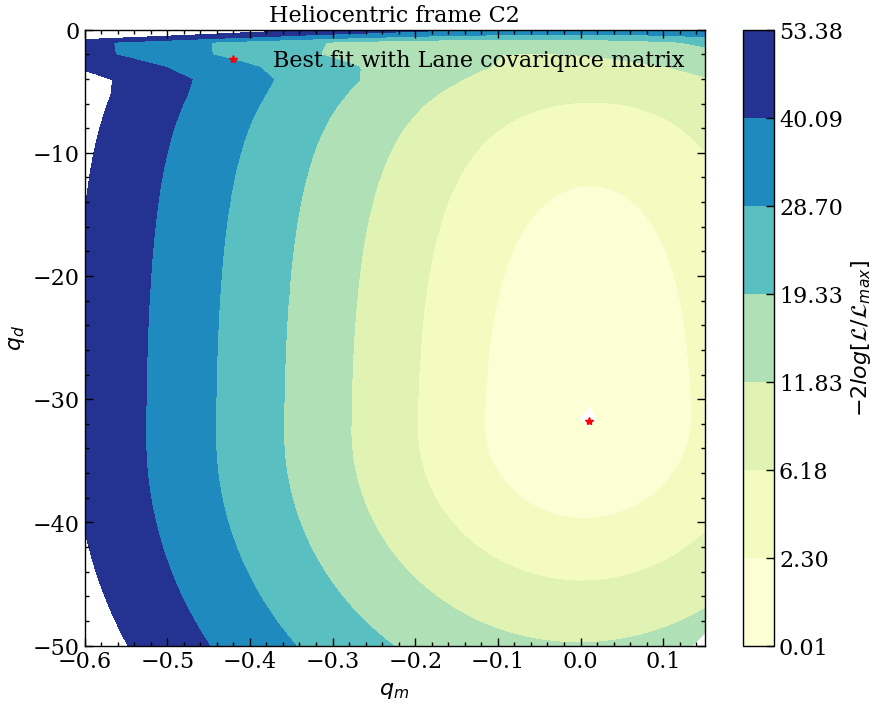

In [ ]:
path='/Storage/animesh/Analysis_C2/Output/QM_QD_SCAN.txt'
df = pd.read_csv(path, header=None)
df.columns = ['qm', 'qd', 'MLE', 'success', 'S']
df=df[df['success']]
df.sort_values(['qm','qd'])
qm_hel_C2 = df['qm']
qd_hel_C2 = df['qd']
MLE_hel_C2 = df['MLE']
xi = np.linspace(qm_hel_C2.min(), qm_hel_C2.max(), 100)
yi = np.linspace(qd_hel_C2.min(), qd_hel_C2.max(), 100)
xi, yi = np.meshgrid(xi, yi)
plt.figure(figsize=(10,8))
MLE_hel_C2=MLE_hel_C2-(-184.9)
levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09]
zi = plt.tricontourf(qm_hel_C2 , qd_hel_C2, MLE_hel_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")
plt.legend()
plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
plt.xlabel('$q_m$')
plt.ylabel('$q_d$')
plt.title('Heliocentric frame C2')

Text(0.5, 1.0, 'LG frame C2')

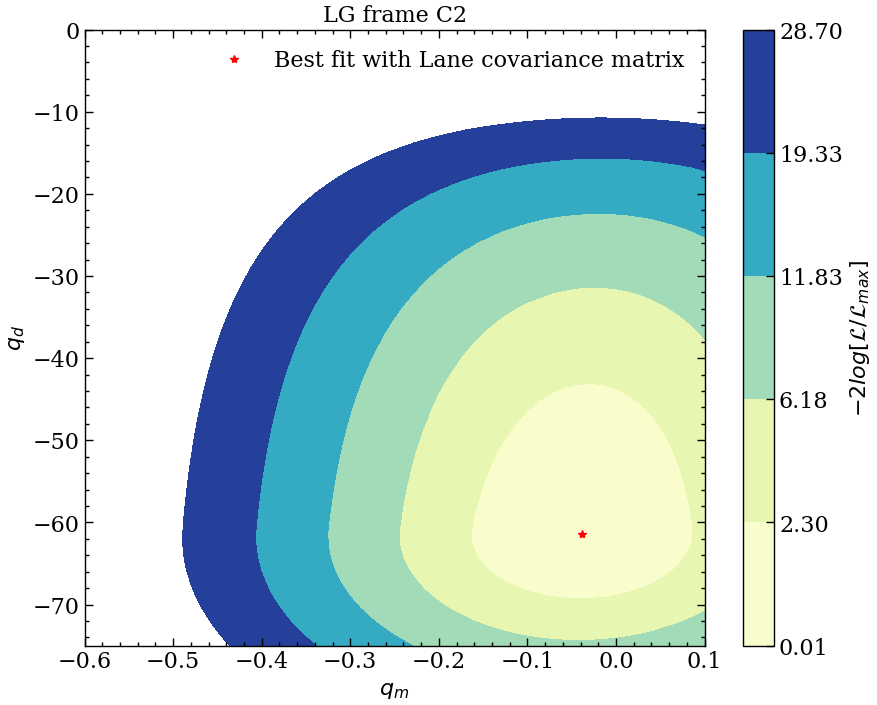

In [ ]:
path='/Storage/animesh/Analysis_C2/Output/QM_QD_SCAN_11.txt'
df = pd.read_csv(path, header=None)
df.columns = ['qm', 'qd', 'MLE', 'success', 'S']
df=df[df['success']]
df.sort_values(['qm','qd'])

qm_LG_C2 = df['qm']
qd_LG_C2 = df['qd']
MLE_LG_C2 = df['MLE']
xi = np.linspace(qm_LG_C2.min(), qm_LG_C2.max(), 100)
yi = np.linspace(qd_LG_C2.min(), qd_LG_C2.max(), 100)
xi, yi = np.meshgrid(xi, yi)
plt.figure(figsize=(10,8))
MLE_LG_C2=MLE_LG_C2-(-187.17)
levels=[0.01,2.295749,6.18,11.829,19.33,28.7,]
zi = plt.tricontourf(qm_LG_C2, qd_LG_C2, MLE_LG_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,], cmap="YlGnBu")
plt.legend()
plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
plt.xlabel('$q_m$')
plt.ylabel('$q_d$')
plt.title('LG frame C2')

Text(0.5, 1.0, 'CMB frame C2')

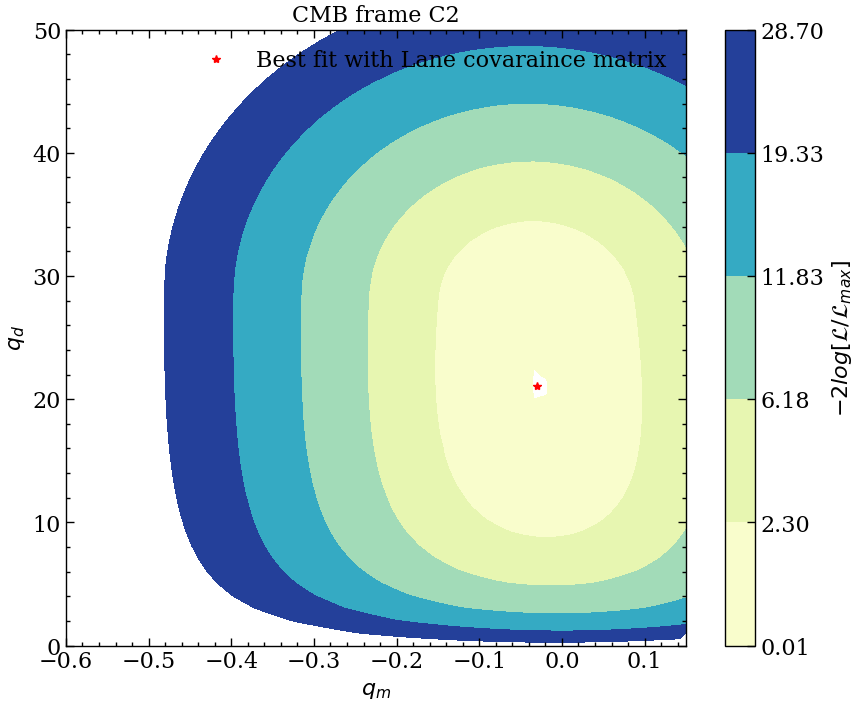

In [ ]:
path='/Storage/animesh/Analysis_C2/Output/QM_QD_SCAN_10.txt'
df = pd.read_csv(path, header=None)
df.columns = ['qm', 'qd', 'MLE', 'success', 'S']
df=df[df['success']]
df.sort_values(['qm','qd'])
min(df['MLE'])
qm_CMB_C2 = df['qm']
qd_CMB_C2 = df['qd']
MLE_CMB_C2 = df['MLE']
xi = np.linspace(qm_CMB_C2.min(), qm_CMB_C2.max(), 100)
yi = np.linspace(qd_CMB_C2.min(), qd_CMB_C2.max(), 100)
xi, yi = np.meshgrid(xi, yi)
plt.figure(figsize=(10,8))
MLE_CMB_C2=MLE_CMB_C2-(-188.343)
levels=[0.01,2.295749,6.18,11.829,19.33,28.7,]
zi = plt.tricontourf(qm_CMB_C2, qd_CMB_C2, MLE_CMB_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,], cmap="YlGnBu")
   
plt.legend()
plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
plt.xlabel('$q_m$')
plt.ylabel('$q_d$')
plt.title('CMB frame C2')

In [ ]:

cmb_qm_qd='/Storage/animesh/Analysis_C1/Outputs/LANE_C1_SCAN_QM_QD_ZINDEX=8.txt'
lg_qm_qd='/Storage/animesh/Analysis_C1/Outputs/LANE_C1_SCAN_QM_QD_ZINDEX=9_v2.txt'
hel_qm_qd='/Storage/animesh/Analysis_C1/Outputs/LANE_C1_SCAN_QM_QD_ZINDEX=7.txt'
import numpy as np
import re

def read_arrays_from_file(file_path):

    try:
        with open(file_path, 'r') as file:
            content = file.read()

        # Extract the qm array
        qm_match = re.search(r'qm:\s*\[([^\]]+)\]', content)
        qm_array = np.fromstring(qm_match.group(1), sep=' ') if qm_match else None

        # Extract the qd array
        qd_match = re.search(r'qd:\s*\[([^\]]+)\]', content)
        qd_array = np.fromstring(qd_match.group(1), sep=' ') if qd_match else None

        # Extract the unnamed array
        unnamed_match = re.search(r'\[([^\]]+)\]$', content)
        unnamed_array = np.fromstring(unnamed_match.group(1), sep=',') if unnamed_match else None

        return qm_array, qd_array, unnamed_array

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None



def read_arrays_from_file_ra_dec(file_path):

    try:
        with open(file_path, 'r') as file:
            content = file.read()

        # Extract the qm array
        qm_match = re.search(r'ra:\s*\[([^\]]+)\]', content)
        qm_array = np.fromstring(qm_match.group(1), sep=' ') if qm_match else None

        # Extract the qd array
        qd_match = re.search(r'dec:\s*\[([^\]]+)\]', content)
        qd_array = np.fromstring(qd_match.group(1), sep=' ') if qd_match else None

        # Extract the unnamed array
        unnamed_match = re.search(r'\[([^\]]+)\]$', content)
        unnamed_array = np.fromstring(unnamed_match.group(1), sep=',') if unnamed_match else None

        return qm_array, qd_array, unnamed_array

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None


In [12]:
qm_lg, qd_lg, MLE_lg = read_arrays_from_file(lg_qm_qd)
qm_hel, qd_hel, MLE_hel = read_arrays_from_file(hel_qm_qd)
qm_cmb, qd_cmb, MLE_cmb = read_arrays_from_file(cmb_qm_qd)

def contour_plots(x,y,MLE,MLE_true=None,X0=None,Y0=None):
    X,Y=np.meshgrid(x,y)
    x=X.flatten()
    y=Y.flatten()
    MLE=MLE-MLE_true
    levels=[0.01,2.295749,6.18,11.829,19.33,28.7,]
    return x,y,MLE

QM_lg,QD_lg=np.meshgrid(qm_lg,qd_lg)
qm_lg=QM_lg.flatten()
qd_lg=QD_lg.flatten()
MLE_lg=MLE_lg+1161.05
QM_cmb,QD_cmb=np.meshgrid(qm_cmb,qd_cmb)
qm_cmb=QM_cmb.flatten()
qd_cmb=QD_cmb.flatten()
MLE_cmb=MLE_cmb+1169.21
QM_hel,QD_hel=np.meshgrid(qm_hel,qd_hel)
qm_hel=QM_hel.flatten()
qd_hel=QD_hel.flatten()
MLE_hel=MLE_hel+1163.16


/tmp/ipykernel_677375/4056620865.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')


[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20'),
 Text(0, 25, '25'),
 Text(0, 30, '30')]

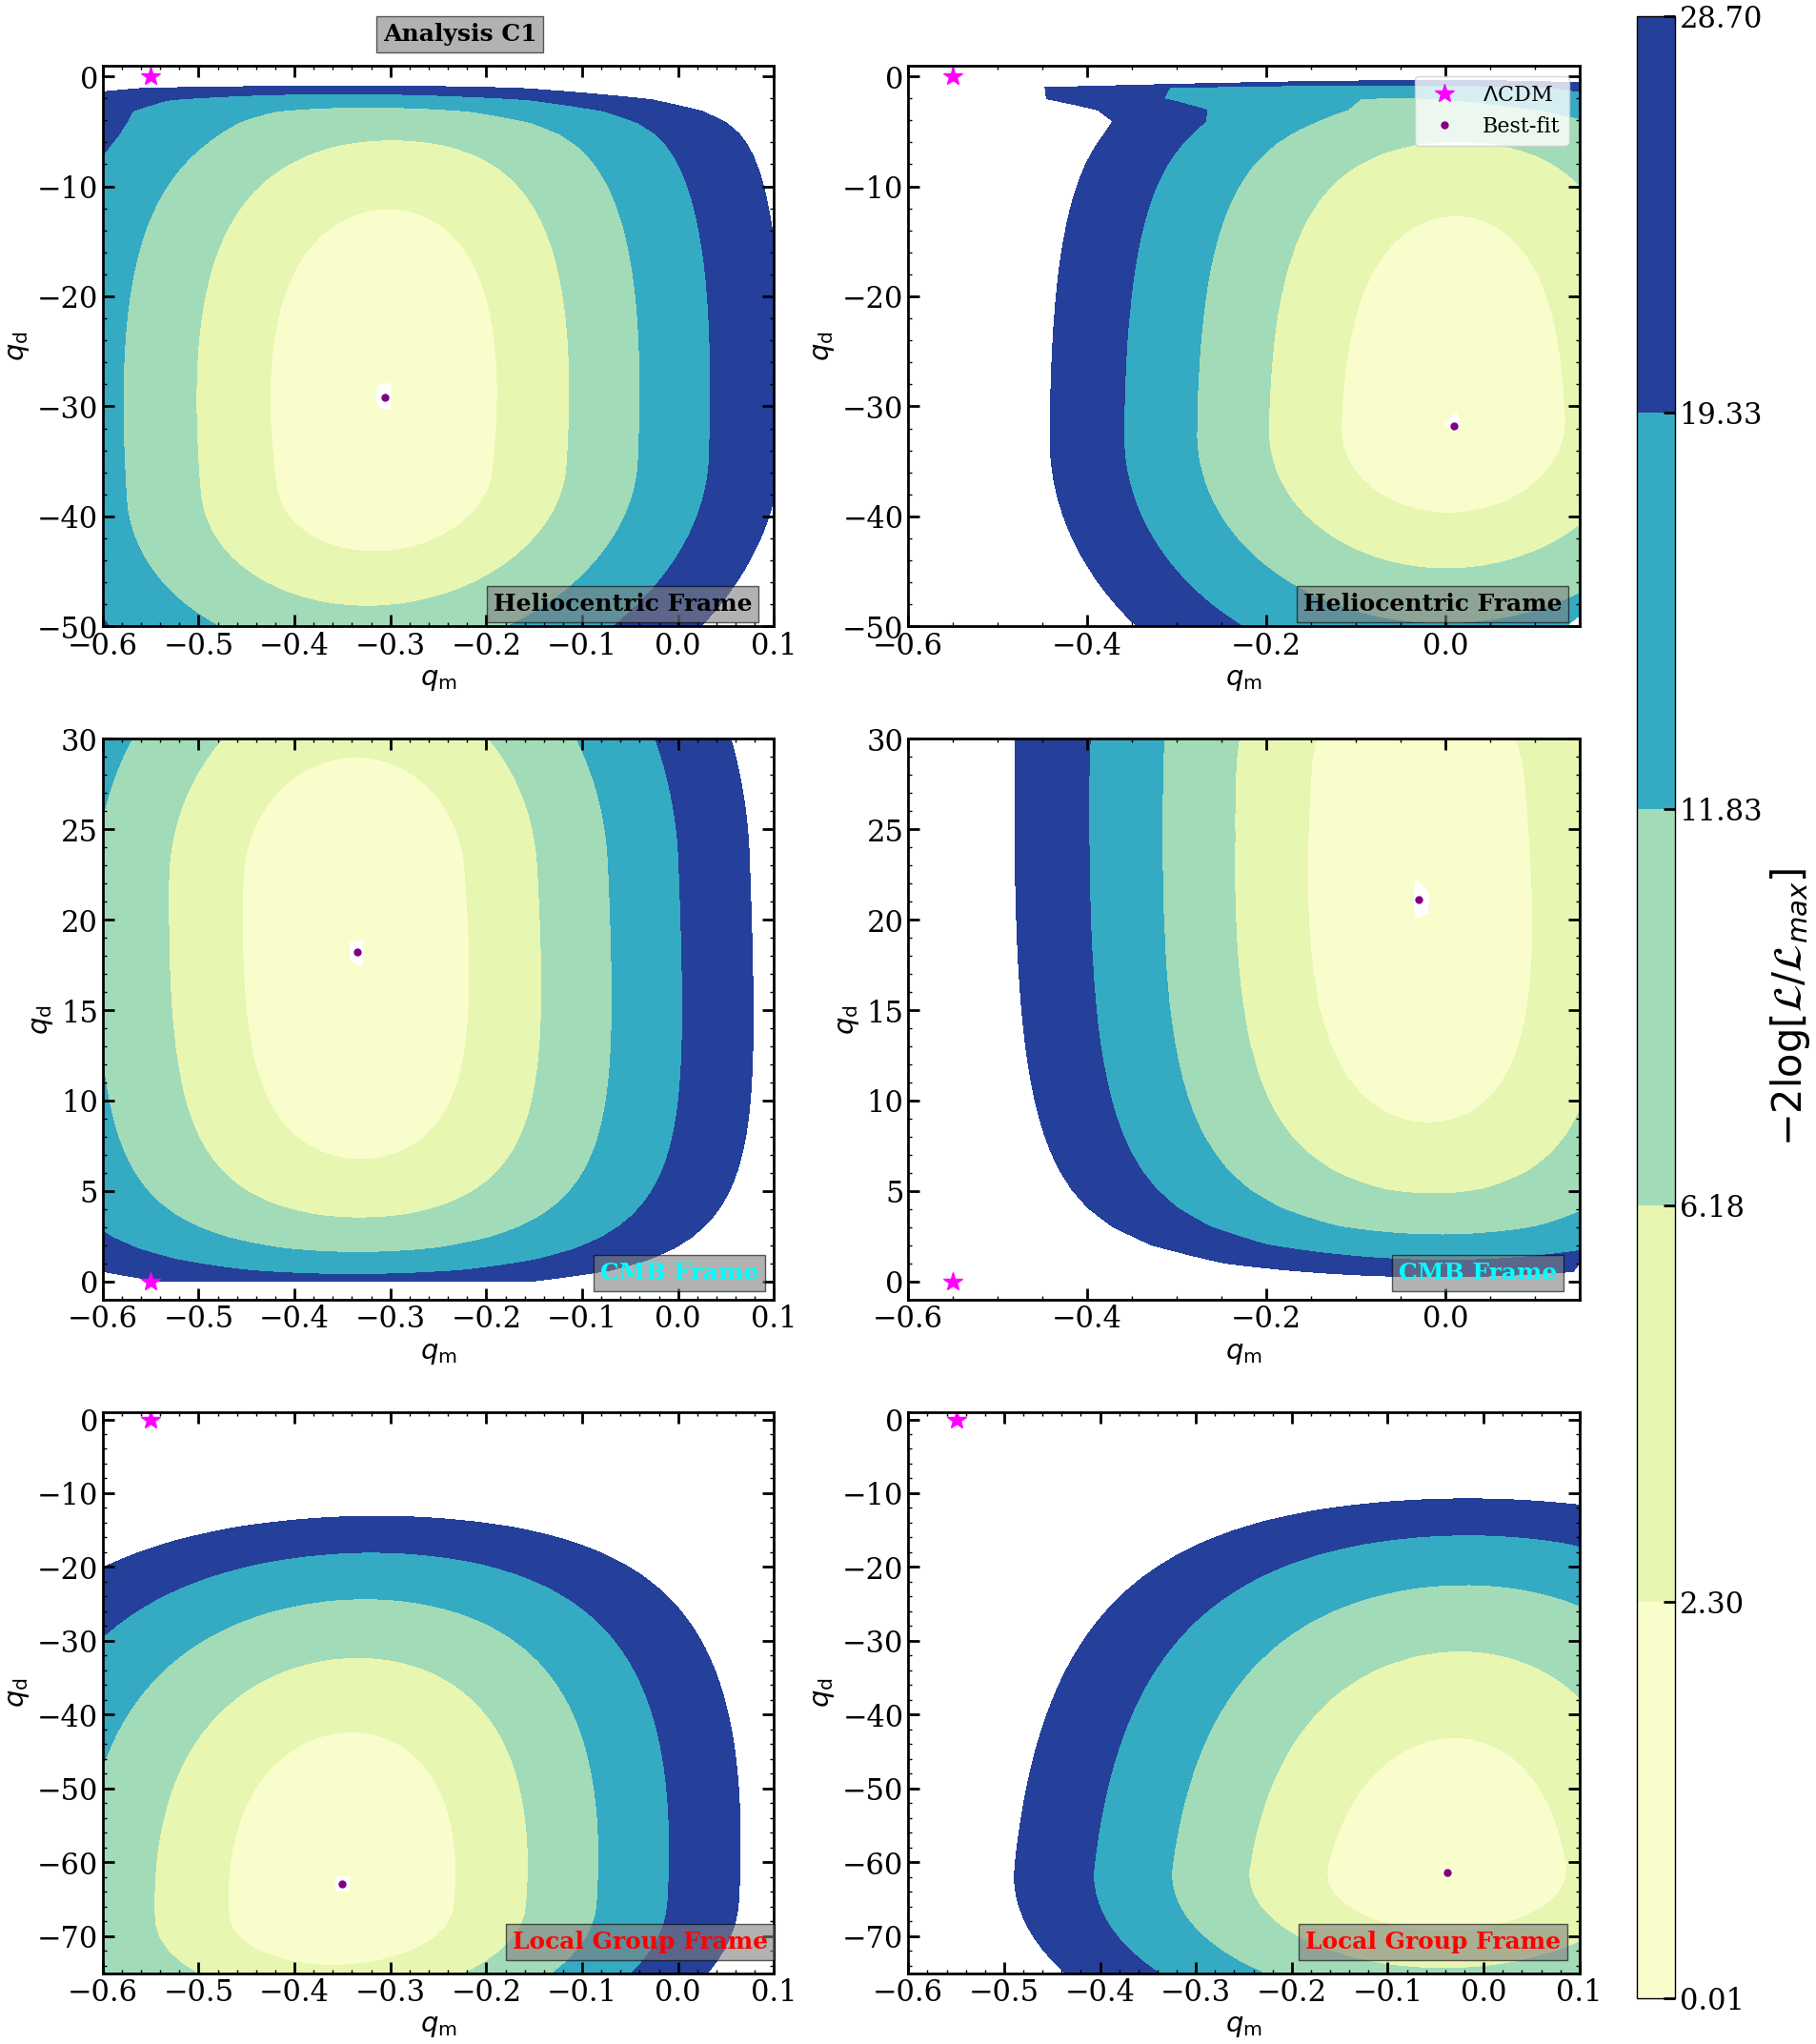

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20,26))
#fig.tight_layout()
ax[1,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
contour_plot= ax[1,0].tricontourf(qm_cmb, qd_cmb, np.array(MLE_cmb),  cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
#plt.contourf(x, y, np.array(MLE_CMB)+1519.33, cmap='YlGnBu',levels=5)

#plt.plot(-0.397, 20.14,'r.',ms='10',label='Bestfit')
ax[1,0].plot(-0.335, 18.2,'.',ms='10',label='Best-fit',color='purple')
#leg=plt.legend(frameon=True,fontsize=20)
#cbar =plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
#cbar.ax.yaxis.label.set_fontsize(18)
ax[1,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[1,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[0,0].tricontourf(qm_hel, qd_hel, np.array(MLE_hel), cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
#plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')
ax[0,1].set_ylim(-50,1)

ax[0,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[0,0].plot(-0.306, -29.2 ,'.',ms='10',label='Best-fit',color='purple')
ax[0,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[0,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)


ax[2,0].tricontourf(qm_lg, qd_lg, np.array(MLE_lg), cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])

ax[2,0].plot(-0.35, -62.9,'.',ms='10',label='Best-fit',color='purple')
ax[2,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[2,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[2,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)


ax[0,0].tricontourf(qm_hel, qd_hel, np.array(MLE_hel), cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
#plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')

ax[0,1].tricontourf(qm_hel_C2 , qd_hel_C2, MLE_hel_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")
ax[0,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
#ax[0,1].plot(-0.198, -14.717, '.', ms='10', label='Best-fit',color='purple')
ax[0,1].plot(0.01,-31.76, '.', ms='10', label='Best-fit',color='purple')

ax[0,1].legend(frameon=True)

ax[0,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[0,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[1,0].set_ylim(-1,30)

ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')
#ax[1,1].legend(frameon=True)

ax[1,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[1,1].tricontourf(qm_CMB_C2, qd_CMB_C2, MLE_CMB_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")

ax[1,1].set_ylim(-1,30)

ax[1,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[1,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[1,1].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')

ax[2,0].set_ylim(-75,1)

ax[2,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')


#ax[2,1].contourf(x_C2_LG, y_C2_LG, MLE_LG_C2_corrdl+151.69358142520105,cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
ax[2,1].plot(-3.78313270e-02,-6.14145470e+01, '.', ms='10', label='Best-fit',color='purple')

#ax[2,1].contourf(X_C2_LG, Y_C2_LG, MLE_C2_LG+151.02687934015466, cmap='YlGnBu',levels=levels)
ax[2,1].tricontourf(qm_LG_C2, qd_LG_C2, MLE_LG_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")

ax[2,1].set_ylim(-75,1)
ax[2,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[2,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# for i in range(0,3):
#     for j in range (0,2):
#         ax[i,j].tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
#         for axis in 'left', 'bottom','top','right':
#            ax[i,j].spines[axis].set_linewidth(2)
for i in range(0, 3):
    for j in range(0, 2):
        
            ax[i, j].set_ylim(ax[i, j].get_ylim())  # To ensure consistent axis limits
            ax[i, j].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')
            for axis in ['left', 'bottom', 'top', 'right']:
                ax[i, j].spines[axis].set_linewidth(2)

fig.text(0.272,0.89,'Analysis C1',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='k',weight='bold')



fig.text(0.386,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')
fig.text(0.805,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')

fig.text(0.33,0.66,'Heliocentric Frame',size=18 ,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')
fig.text(0.755,0.66,'Heliocentric Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')

fig.text(0.34,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
fig.text(0.756,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
#fig.tight_layout(pad=1.0)
#fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Increase horizontal and vertical space between subplots

cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
cbar = fig.colorbar(contour_plot, cax=cax)
cbar.set_label('$-2 \log [\mathcal{L}/\mathcal{L}_{max}]$', fontsize=30)
for axis in 'left', 'bottom','top','right':
           cbar.ax.spines[axis].set_linewidth(2)
cbar.ax.tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
# Set y-ticks at 0, 5, 10, 15, 20
ax[1,1].set_yticks([0, 5, 10, 15, 20,25,30])

# Set corresponding labels
ax[1,1].set_yticklabels(['0', '5', '10', '15', '20','25','30'], fontsize=22)

#plt.show()
#plt.savefig('qd_qm_lane.pdf')


In [7]:
MLE_CMB=[-1478.1861243525289, -1479.4260688433421, -1480.5686596987714, -1481.6133632475355, -1482.5596504437951, -1483.406996835433, -1484.1548825800073, -1484.8027924076325, -1485.3502156650154, -1485.7966463250755, -1486.1415830392261, -1486.3845291870778, -1486.5249929283873, -1486.5624872939031, -1486.4965302774995, -1486.3266449324688, -1486.052359502283, -1485.6732075522273, -1485.1887281318275, -1484.598465916677, -1483.9019714136439, -1483.098801153614, -1482.1885179021117, -1481.170690901724, -1480.0448961160994, -1478.8107165120568, -1477.467742326715, -1476.0155714039563, -1474.4538095011721, -1472.7820706466387, -1470.999977507233, -1469.1071617787682, -1467.103264597693, -1464.9879369745156, -1462.760840249112, -1460.4216465680959, -1457.9700393842136, -1455.405713977719, -1452.7283779994557, -1449.9377520352784, -1479.7558803992529, -1480.996469051972, -1482.1396722224003, -1483.1849563309138, -1484.1317923896984, -1484.9796559821048, -1485.7280272512032, -1486.376390901934, -1486.9242362148138, -1487.3710570737403, -1487.7163520014171, -1487.9596242127363, -1488.1003816788775, -1488.1381372053056, -1488.072408523531, -1487.9027183969795, -1487.6285947413378, -1487.24957075973, -1486.7651850931356, -1486.1749819864337, -1485.47851147053, -1484.675329561017, -1483.7649984737473, -1482.7470868578912, -1481.621170046891, -1480.3868303278214, -1479.043657229614, -1477.5912478306716, -1476.029207086294, -1474.3571481764106, -1472.5746928740243, -1470.6814719347697, -1468.677125507951, -1466.5613035693275, -1464.3336663758937, -1461.9938849428027, -1459.541641542455, -1456.9766302256805, -1454.2985573648405, -1451.5071422184142, -1487.574402929023, -1488.8300012834827, -1489.9884164353243, -1491.0491321226868, -1492.0116376609676, -1492.8754280268809, -1493.640003965814, -1494.3048721241917, -1494.8695452088361, -1495.3335421755942, -1495.6963884498648, -1495.9576161810626, -1496.1167645355804, -1496.1733800303393, -1496.1270169117238, -1495.977237584761, -1495.723613095258, -1495.3657236740862, -1494.9031593459063, -1494.335520610796, -1493.6624192050342, -1492.8834789480059, -1491.9983366822942, -1491.00664331348, -1489.9080649553957, -1488.702284184694, -1487.3890014061678, -1485.9679363261419, -1484.4388295261656, -1482.8014441219996, -1481.0555674846084, -1479.2010129899413, -1477.2376217541844, -1475.1652643021011, -1472.983842110561, -1470.693288969679, -1468.2935721142646, -1465.7846931005001, -1463.1666884387434, -1460.4396300421063, -1493.8213974409252, -1495.0731519271483, -1496.227356471926, -1497.2834813730408, -1498.2410013130047, -1499.099395341228, -1499.8581468679042, -1500.516743669692, -1501.074677907221, -1501.5314461553517, -1501.8865494462, -1502.1394933237939, -1502.2897879138436, -1502.3369480058254, -1502.2804931491376, -1502.1199477638313, -1501.8548412658276, -1501.4847082072533, -1501.009088432417, -1500.4275272497136, -1499.7395756201993, -1498.944790363156, -1498.0427343793858, -1497.032976892736, -1495.9150937105069, -1494.6886675033868, -1493.353288105647, -1491.9085528361954, -1490.3540668413234, -1488.6894434598448, -1486.9143046113825, -1485.0282812086539, -1483.031013594475, -1480.9221520043827, -1478.7013570556717, -1476.3683002636924, -1473.9226645862966, -1471.3641449973475, -1468.6924490901804, -1465.9072977120259, -1497.835564417103, -1499.0852287271448, -1500.237194948547, -1501.2909318788911, -1502.2459125705063, -1503.1016143094078, -1503.8575186055255, -1504.5131111943792, -1505.0678820505705, -1505.5213254131284, -1505.872939823485, -1506.1222281749358, -1506.2686977760634, -1506.3118604263575, -1506.2512325054481, -1506.0863350759612, -1505.816694000431, -1505.4418400724594, -1504.9613091628053, -1504.3746423805417, -1503.6813862498589, -1502.8810929029194, -1501.9733202892369, -1500.9576324020584, -1499.8335995224963, -1498.6007984810565, -1497.2588129385947, -1495.8072336857072, -1494.245658961964, -1492.5736947952705, -1490.7909553617922, -1488.897063367037, -1486.8916504484655, -1484.7743576000544, -1482.544835619138, -1480.2027455758853, -1477.7477593054575, -1475.179559923118, -1472.497842362076, -1469.7023139340654, -1500.6194963336789, -1501.8702657696422, -1503.0232711781432, -1504.0779812865082, -1505.033869034286, -1505.8904115515413, -1506.6470901483426, -1507.3033903158253, -1507.8588017387492, -1508.3128183201388, -1508.6649382179767, -1508.9146638941959, -1509.0615021765175, -1509.1049643330787, -1509.0445661603353, -1508.8798280845879, -1508.61027527734, -1508.2354377849892, -1507.754850673171, -1507.168054186153, -1506.47459392178, -1505.6740210223563, -1504.7658923819688, -1503.7497708707344, -1502.625225576492, -1501.3918320644498, -1500.0491726552862, -1498.5968367223404, -1497.0344210083, -1495.3615299620112, -1493.577776095921, -1491.6827803645942, -1489.6761725648578, -1487.557591757938, -1485.326686714027, -1482.9831163795388, -1480.5265503673395, -1477.9566694700604, -1475.2731661965445, -1472.4757453312923, -1502.658016193125, -1503.9112938725575, -1505.0667605243038, -1506.1238846770366, -1507.0821390386784, -1507.9410004738868, -1508.6999499926394, -1509.3584727503703, -1509.9160580596365, -1510.3721994137018, -1510.726394522222, -1510.9781453591233, -1511.1269582232858, -1511.1723438120687, -1511.1138173077313, -1510.9508984778233, -1510.6831117890604, -1510.3099865355557, -1509.831056981636, -1509.2458625196261, -1508.5539478431356, -1507.754863136195, -1506.848164278781, -1505.8334130692067, -1504.710177445132, -1503.4780318349751, -1502.1365572465543, -1500.6853417496386, -1499.1239806968674, -1497.452077077195, -1495.669241871213, -1493.7750944276163, -1491.7692628612656, -1489.6513844733627, -1487.4211061940773, -1485.0780850480076, -1482.6219886427527, -1480.0524956807335, -1477.3692964943582, -1474.5720936044581, -1504.2088469925995, -1505.464953435749, -1506.6232092744162, -1507.6830827755455, -1508.6440463591234, -1509.5055765747982, -1510.267154089697, -1510.9282636877058, -1511.4883942802664, -1511.9470389290836, -1512.3036948808096, -1512.5578636141113, -1512.7090508992374, -1512.7567668704316, -1512.700526111516, -1512.5398477548856, -1512.2742555943323, -1511.9032782120232, -1511.4264491200076, -1510.8433069167168, -1510.1533954588203, -1509.356264048945, -1508.451467639702, -1507.438567054574, -1506.3171292260681, -1505.0867274518068, -1503.7469416689542, -1502.2973587476733, -1500.7375728040327, -1499.0671855330227, -1497.2858065621767, -1495.3930538263226, -1493.3885539639962, -1491.2719427359762, -1489.0428654663742, -1486.7009775066026, -1484.2459447225915, -1481.6774440053919, -1478.9951638052744, -1476.1988046893161, -1505.4207734013019, -1506.679585112869, -1507.840512496316, -1508.9030235516132, -1509.8665904103482, -1510.7306893116486, -1511.4948005892422, -1512.1584086699904, -1512.7210020839573, -1513.182073486292, -1513.541119691154, -1513.7976417179016, -1513.951144849812, -1514.00113870561, -1513.9471373240995, -1513.7886592622024, -1513.5252277067655, -1513.156370600516, -1512.6816207824456, -1512.100516143221, -1511.4125997958313, -1510.6174202621369, -1509.714531675637, -1508.7034940010465, -1507.583873271178, -1506.3552418416157, -1505.0171786638357, -1503.5692695771845, -1502.0111076204357, -1500.3422933633258, -1498.5624352587706, -1496.6711500161953, -1494.668062996558, -1492.5528086295144, -1490.3250308531917, -1487.9843835769586, -1485.5305311674495, -1482.963148958157, -1480.2819237826277, -1477.4865545313269, -1506.3861870829815, -1507.647437002879, -1508.8107740227065, -1509.875665886507, -1510.8415844520953, -1511.7080056663433, -1512.4744095516635, -1513.1402802037835, -1513.7051058012185, -1514.1683786264364, -1514.5295950990637, -1514.7882558213746, -1514.9438656362381, -1514.995933697869, -1514.9439735556487, -1514.7875032513427, -1514.5260454300249, -1514.1591274651153, -1513.6862815978768, -1513.107045091801, -1512.4209604023038, -1511.6275753622017, -1510.726443383431, -1509.717123675521, -1508.5991814813337, -1507.3721883306268, -1506.0357223119345, -1504.589368363404, -1503.0327185830959, -1501.365372559348, -1499.5869377217348, -1497.6970297132066, -1495.6952727839355, -1493.5813002072855, -1491.3547547185144, -1489.0152889764447, -1486.562566048534, -1483.9962599195837, -1481.3160560241442, -1478.521651802768, -1507.1659904511396, -1508.4293871438886, -1509.5948467404341, -1510.6618367438034, -1511.629828755823, -1512.4982984517928, -1513.266725566412, -1513.9345938909532, -1514.5013912821157, -1514.966609682625, -1515.3297451537771, -1515.590297920289, -1515.7477724275834, -1515.8016774118526, -1515.7515259831762, -1515.5968357219901, -1515.337128789266, -1514.9719320507445, -1514.5007772156362, -1513.9232009901418, -1513.2387452462917, -1512.446957205479, -1511.5473896444576, -1510.5396011024393, -1509.4231561262854, -1508.1976255178506, -1506.8625866058799, -1505.4176235358361, -1503.8623275791304, -1502.1962974624305, -1500.4191397175905, -1498.5304690527325, -1496.5299087450433, -1494.4170910557991, -1492.191657668035, -1489.8532601473526, -1487.40156042613, -1484.83623131144, -1482.1569570168313, -1479.3634337180033, -1507.8022678099173, -1509.0675377480945, -1510.2348500204048, -1511.303671904169, -1512.2734747628062, -1513.1437340199934, -1513.9139291450117, -1514.583543649472, -1515.1520650955672, -1515.618985116132, -1515.9837994466498, -1516.2460079694965, -1516.4051147706489, -1516.4606282091381, -1516.4120609995246, -1516.2589303077261, -1516.0007578605155, -1515.6370700690718, -1515.1673981669346, -1514.591278362828, -1513.908252008671, -1513.1178657834148, -1512.2196718929788, -1511.213228286966, -1510.0980988925444, -1508.8738538661432, -1507.5400698634173, -1506.096330328153, -1504.5422258006022, -1502.8773542458625, -1501.1013214028835, -1499.2137411546419, -1497.2142359200454, -1495.102437068063, -1492.8779853545761, -1490.5405313823944, -1488.0897360846886, -1485.5252712322788, -1482.8468199648187, -1480.054077345974, -1508.3252006637283, -1509.592100296124, -1510.7610246777851, -1511.8314408749204, -1512.8028200287433, -1513.6746373296069, -1514.4463720016543, -1515.1175072990811, -1515.6875305139245, -1516.1559329956112, -1516.5222101824545, -1516.7858616453802, -1516.9463911441073, -1517.0033066960348, -1516.9561206581634, -1516.8043498223383, -1516.5475155241506, -1516.185143765853, -1515.7167653536849, -1515.1419160500172, -1514.4601367407172, -1513.6709736182381, -1512.7739783808804, -1511.768708448717, -1510.6547271967554, -1509.4316042058392, -1508.0989155318384, -1506.656243993744, -1505.1031794811893, -1503.439319282046, -1501.6642684305905, -1499.777640076896, -1497.7790558779288, -1495.6681464109336, -1493.4445516095266, -1491.1079212230004, -1488.6579152991396, -1486.0942046908951, -1483.4164715870593, -1480.6244100670508, -1508.7570852277984, -1510.0254018064054, -1511.1957280134293, -1512.2675307169113, -1513.2402808509148, -1514.1134533887841, -1514.886527327574, -1515.5589856838255, -1516.1303155008102, -1516.6000078680877, -1516.967557951611, -1517.2324650379003, -1517.394232589289, -1517.4523683123984, -1517.406384239544, -1517.2557968234585, -1517.0001270456366, -1516.638900538707, -1516.171647723183, -1515.5979039590009, -1514.9172097122894, -1514.1291107378156, -1513.2331582776071, -1512.2289092762321, -1511.1159266132647, -1509.8937793535, -1508.562043015455, -1507.1202998587423, -1505.568139190879, -1503.9051576941577, -1502.1309597730974, -1500.2451579231242, -1498.2473731209745, -1496.1372352373808, -1493.914383472527, -1491.578466814725, -1489.1291445226498, -1486.5660866315106, -1483.8889744832684, -1481.0975012810395, -1509.1147937644298, -1510.3843424067127, -1511.5558876052744, -1512.628896042046, -1513.6028384570507, -1514.4771896212844, -1515.25142832072, -1515.9250373516852, -1516.4975035277705, -1516.9683176985375, -1517.3369747800664, -1517.6029737978367, -1517.765817941956, -1517.8250146350802, -1517.7800756133868, -1517.630517020787, -1517.375859516803, -1517.015628398425, -1516.5493537363386, -1515.9765705259274, -1515.2968188534994, -1514.5096440781679, -1513.6145970298878, -1512.6112342241418, -1511.4991180938066, -1510.2778172387548, -1508.9469066937083, -1507.5059682149952, -1505.9545905867085, -1504.2923699469375, -1502.5189101345807, -1500.633823057389, -1498.6367290817334, -1496.5272574447056, -1494.3050466889772, -1491.9697451209177, -1489.5210112923473, -1486.958514506213, -1484.281935346424, -1481.4909662319296, -1509.4113508994553, -1510.6819707595098, -1511.8545758221803, -1512.9286325939843, -1513.9036116327627, -1514.7789875201663, -1515.5542388452773, -1516.2288481996213, -1516.8023021836957, -1517.2740914251988, -1517.6437106095225, -1517.910658521643, -1518.0744381014758, -1518.1345565111585, -1518.0905252156065, -1517.9418600763113, -1517.688081458767, -1517.32871435386, -1516.863288513634, -1516.2913386017883, -1515.612404359456, -1514.8260307864907, -1513.9317683390598, -1512.9291731437513, -1511.817807228913, -1510.5972387736756, -1509.2670423752666, -1507.8267993351872, -1506.2760979647944, -1504.614533910946, -1502.841710502266, -1500.9572391165825, -1498.960739570172, -1496.8518405292925, -1494.6301799445337, -1492.295405508441, -1489.8471751368127, -1487.2851574739602, -1484.6090324222023, -1481.8184916956309, -1509.6569811383674, -1510.9285317309675, -1512.102057626687, -1513.1770251662715, -1514.152904735998, -1515.0291707397796, -1515.805301582439, -1516.4807796643802, -1517.055091387746, -1517.527727174365, -1517.8981814955712, -1518.165952914307, -1518.3305441395487, -1518.3914620934622, -1518.3482179915402, -1518.2003274359777, -1517.9473105227016, -1517.5886919623335, -1517.124001215523, -1516.5527726430275, -1515.8745456709714, -1515.0888649717695, -1514.19528066116, -1513.1933485118582, -1512.0826301844102, -1510.8626934756967, -1509.5331125857522, -1508.0934684034057, -1506.5433488113713, -1504.8823490113573, -1503.1100718698056, -1501.226128284845, -1499.2301375750117, -1497.1217278903036, -1494.9005366460656, -1492.5662109801679, -1490.1184082338968, -1487.556796456857, -1484.8810549361253, -1482.090874749794, -1509.8598268602946, -1511.1321848605992, -1512.3065095052484, -1513.3822669779536, -1514.3589275029797, -1515.2359653169103, -1516.0128586516266, -1516.6890897286016, -1517.2641447647582, -1517.7375139900703, -1518.1086916770637, -1518.3771761825437, -1518.542470001701, -1518.604079834914, -1518.5615166674993, -1518.4142958627533, -1518.161937268578, -1517.803965338079, -1517.3399092644872, -1516.769303130845, -1516.091686074856, -1515.3066024693676, -1514.413602118992, -1513.4122404733125, -1512.3020788572794, -1511.0826847192727, -1509.7536318974517, -1508.3145009049279, -1506.7648792343887, -1505.1043616827358, -1503.3325506963686, -1501.4490567376622, -1499.4534986732403, -1497.345504184602, -1495.124710201564, -1492.7907633590785, -1490.3433204777198, -1487.7820490682855, -1485.1066278606602, -1482.3167473571314, -1510.0264534997455, -1511.2995100657374, -1512.474525683908, -1513.5509663888681, -1514.528302251524, -1515.4060073505543, -1516.183559755039, -1516.8604415184986, -1517.4361386843843, -1517.9101413034198, -1518.2819434627513, -1518.5510433273766, -1518.7169431939258, -1518.7791495571291, -1518.7371731892467, -1518.590529232758, -1518.3387373066537, -1517.9813216266598, -1517.517811139826, -1516.9477396738077, -1516.2706461013643, -1515.4860745204503, -1514.5935744504327, -1513.5927010448968, -1512.4830153216485, -1511.2640844103366, -1509.935481818414, -1508.4967877158615, -1506.9475892394007, -1505.2874808167026, -1503.5160645112535, -1501.6329503884049, -1499.6377569032566, -1497.5301113108692, -1495.309650099351, -1492.9760194462926, -1490.528875698952, -1487.9678858785485, -1485.292728208872, -1482.5030926694021, -1510.1622130331682, -1511.435871601458, -1512.6114825528641, -1513.6885117801664, -1514.666429208819, -1515.5447087681125, -1516.322828373568, -1517.000269920619, -1517.5765192898787, -1518.0510663640932, -1518.4234050571881, -1518.6930333551284, -1518.8594533696369, -1518.9221714042521, -1518.8806980334548, -1518.7345481950638, -1518.4832412961912, -1518.1263013331547, -1517.663257025718, -1517.0936419660477, -1516.416994782848, -1515.6328593211158, -1514.7407848379682, -1513.7403262151347, -1512.631044188518, -1511.412505595506, -1510.0842836404938, -1508.6459581792556, -1507.0971160227684, -1505.4373512610366, -1503.6662656075514, -1501.7834687650025, -1499.7885788127587, -1497.6812226167442, -1495.461036262176, -1493.127665509683, -1490.6807662751926, -1488.1200051339652, -1485.4450598489755, -1482.655619923852, -1510.2715106160929, -1511.5456850962544, -1512.721806094174, -1513.7993393674935, -1514.777754703448, -1515.6565258897688, -1516.4351306967742, -1517.113050870886, -1517.6897721393987, -1518.1647842274265, -1518.5375808864871, -1518.8076599351718, -1518.974523312556, -1519.0376771439826, -1518.9966318199063, -1518.8509020879844, -1518.600007158744, -1518.2434708251997, -1517.7808215967689, -1517.2115928479313, -1516.5353229820448, -1515.7515556107624, -1514.8598397495396, -1513.859730029783, -1512.7507869280869, -1511.5325770131758, -1510.2046732111, -1508.7666550892563, -1507.218109159833, -1505.558629203315, -1503.7878166125886, -1501.9052807583048, -1499.9106393760349, -1497.803518975815, -1495.5835552745825, -1493.2503936520043, -1490.803689630105, -1488.2431093770513, -1485.5683302353552, -1482.7790412746333, -1510.3580035030966, -1511.6326167970085, -1512.8091714467855, -1513.8871330811244, -1514.8659713557265, -1515.7451599239541, -1516.5241764186267, -1517.2025024453026, -1517.779623586835, -1518.2550294199693, -1518.6282135437518, -1518.8986736199317, -1519.0659114260477, -1519.1294329210186, -1519.0887483236872, -1518.9433722046554, -1518.6928235916662, -1518.3366260889447, -1517.874308010829, -1517.3054025301496, -1516.629447841733, -1515.8459873415384, -1514.954569821861, -1513.954749683152, -1512.846087162971, -1511.6281485825925, -1510.3005066118938, -1508.8627405530474, -1507.3144366436677, -1505.655188379966, -1503.8845968605656, -1502.0022711515496, -1500.007828673301, -1497.9008956097732, -1495.6811073406404, -1493.3481088968706, -1490.9015554401096, -1488.3411127662648, -1485.6664578335128, -1482.87727931494, -1510.424751671437, -1511.6997344540457, -1512.8766540492436, -1513.9549759625613, -1514.934169724368, -1515.81370886027, -1516.5930708727244, -1517.2717372339546, -1517.8491933904193, -1518.3249287790736, -1518.6984368554827, -1518.969215134187, -1519.1367652413264, -1519.2005929800916, -1519.160208409014, -1519.0151259335173, -1518.7648644110814, -1518.408947270288, -1517.946902644228, -1517.3782635185821, -1516.7025678948805, -1515.9193589693268, -1515.0281853277597, -1514.0286011571845, -1512.9201664744135, -1511.702447372419, -1510.3750162848996, -1508.937452269708, -1507.3893413116753, -1505.7302766455246, -1503.959859099343, -1502.0776974593819, -1500.0834088566285, -1497.9766191757883, -1495.7569634872048, -1493.4240865021895, -1490.9776430521936, -1488.4172985922128, -1485.7427297286263, -1482.953624771712, -1510.4743333924337, -1511.7496231018265, -1512.9268456268253, -1514.0054663551828, -1514.984954697728, -1515.8647840584836, -1516.6444318159847, -1517.3233793164036, -1517.9011118769374, -1518.3771188026888, -1518.7508934141104, -1519.0219330872667, -1519.1897393061793, -1519.2538177281501, -1519.2136782616342, -1519.0688351577658, -1518.8188071151435, -1518.4631173987036, -1518.0012939728547, -1517.4328696493244, -1516.7573822501495, -1515.9743747862915, -1515.0833956522958, -1514.0839988375742, -1512.9757441548027, -1511.7581974859866, -1510.4309310467804, -1508.9935236696342, -1507.445561106371, -1505.786636350797, -1504.0163499819812, -1502.1343105287278, -1500.1401348559455, -1498.0334485733727, -1495.8138864672942, -1493.4810929556206, -1491.0347225669143, -1488.47444044359, -1485.7999228696435, -1483.010857823037, -1510.5089349650957, -1511.7844749603198, -1512.9619442583623, -1514.040808134304, -1515.0205358847957, -1515.9006007980443, -1516.6804801349458, -1517.359655121671, -1517.9376109534164, -1518.4138368105178, -1518.7878258860844, -1519.0590754256593, -1519.227086779813, -1519.291365468829, -1519.2514212606275, -1519.1067682619232, -1518.8569250228968, -1518.501414655786, -1518.0397649678089, -1517.4715086087795, -1516.7961832338744, -1516.0133316819993, -1515.122502170237, -1514.1232485048654, -1513.0151303095365, -1511.7977132710807, -1510.4705694035993, -1509.0332773313535, -1507.485422591116, -1505.8265979545326, -1504.0564037711524, -1502.1744483326952, -1500.1803482591786, -1498.0737289074366, -1495.854224802617, -1493.5214800931046, -1491.075149029337, -1488.5148964668913, -1485.8403983940602, -1483.051342484169, -1510.5304211380287, -1511.806159991776, -1512.983825066179, -1514.0628815283883, -1515.042798566006, -1515.9230493567925, -1516.7031110494395, -1517.3824647568451, -1517.960595557932, -1518.4369925152757, -1518.8111487015838, -1519.0825612395142, -1519.2507313540348, -1519.3151644365898, -1519.2753701233387, -1519.1308623857187, -1518.8811596350677, -1518.5257848409788, -1518.064265664027, -1517.49613460314, -1516.8209291581904, -1516.038192008134, -1515.1474712052247, -1514.148320385839, -1513.040298998406, -1511.82297254902, -1510.4959128652908, -1509.0586983790106, -1507.5109144282974, -1505.8521535797272, -1504.0820159711523, -1502.2001096757674, -1500.2060510880171, -1498.0994653319383, -1495.8799866924599, -1493.5472590701681, -1491.1009364599718, -1488.5406834540415, -1485.866175769297, -1483.0771007996289, -1510.5403909157892, -1511.8162818161493, -1512.994096239064, -1514.0732992482917, -1515.0533599271903, -1515.9337513480725, -1516.7139505532898, -1517.393438546835, -1517.971700298474, -1518.4482247588908, -1518.8225048870481, -1519.094037689689, -1519.2623242731822, -1519.3268699081773, -1519.2871841069311, -1519.1427807140487, -1518.8931780108642, -1518.5378988335997, -1518.0764707058734, -1517.5084259858959, -1516.8333020288633, -1516.0506413648804, -1515.1599918929928, -1514.1609070918041, -1513.0529462471993, -1511.8356746977659, -1510.5086640984237, -1509.0714927029046, -1507.523745665688, -1505.8650153639348, -1504.0949017401153, -1502.2130126658756, -1500.2189643277761, -1498.112381635442, -1495.8928986527244, -1493.5601590522863, -1491.1138165941509, -1488.5535356285193, -1485.8789916231704, -1483.0898717156012, -1510.5402221777226, -1511.8162224186115, -1512.9941438274484, -1514.073451368942, -1515.0536140266045, -1515.9341047721973, -1516.7144005463635, -1517.3939822502912, -1517.9723347494648, -1518.4489468887273, -1518.8233115194457, -1519.094925538863, -1519.263289941648, -1519.3279098847174, -1519.2882947637302, -1519.143958304423, -1518.8944186662882, -1518.539198560703, -1518.0778253833075, -1517.509831360977, -1516.8347537140037, -1516.0521348338968, -1515.1615224771924, -1514.1624699758859, -1513.0545364649938, -1511.8372871277534, -1510.5102934590943, -1509.0731335479345, -1507.5253923789085, -1505.866662154147, -1504.0965426357118, -1502.214641509302, -1500.2205747698156, -1498.1139671293615, -1495.8944524482486, -1493.5616741894648, -1491.115285897078, -1488.5549516989886, -1485.8803468342117, -1483.0911582049825, -1510.5311076442752, -1511.8071781885742, -1512.9851678541777, -1514.0645415106876, -1515.0447680462228, -1515.925320336325, -1516.7056752249784, -1517.3853135151965, -1517.963719973517, -1518.4403833444296, -1518.8147963774602, -1519.0864558663407, -1519.2548627005192, -1519.3195219293532, -1519.279942839363, -1519.1356390444419, -1518.8861285897863, -1518.5309340699544, -1518.0695827608554, -1517.5016067667175, -1516.8265431820043, -1516.0439342690856, -1515.1533276518678, -1514.1542765260656, -1513.0463398865845, -1511.829082772547, -1510.5020765306044, -1509.064899097057, -1507.5171352994196, -1505.8583771780393, -1504.0882243283738, -1502.2062842645194, -1500.2121728046693, -1498.105514478938, -1495.8859429602585, -1493.5531015187053, -1491.1066434998422, -1488.5462328273184, -1485.8715445301461, -1483.0822652947227, -1510.5140840878114, -1511.7901891904373, -1512.9682116443082, -1514.0476162279515, -1515.027871737998, -1515.9084509582347, -1516.6888306400074, -1517.368491493323, -1517.9469181905074, -1518.423599380833, -1518.7980277173774, -1519.0696998960027, -1519.2381167067738, -1519.3027830979502, -1519.2632082529833, -1519.1189056807868, -1518.8693933194793, -1518.5141936540354, -1518.0528338484514, -1517.4848458922636, -1516.809766762556, -1516.0271386013387, -1515.1365089090425, -1514.137430754656, -1513.0294630029225, -1511.812170559252, -1510.485124632839, -1509.0479030186548, -1507.5000903988455, -1505.8412786642189, -1504.0710672563528, -1502.1890635310294, -1500.194883143497, -1498.088150456241, -1495.8684989696976, -1493.5355717765315, -1491.0890220398421, -1488.528513495733, -1485.8537209804786, -1483.0643309825525, -1510.4900562227026, -1511.7661631033536, -1512.9441858142677, -1514.0235890464428, -1515.0038415090294, -1515.8844158978409, -1516.664788876515, -1517.344441065701, -1517.9228570484245, -1518.3995253835897, -1518.7739386328649, -1519.0455933995584, -1519.2139903798404, -1519.2786344266278, -1519.2390346264551, -1519.0947043895446, -1518.8451615534195, -1518.489928500439, -1518.0285322897712, -1517.4605048038602, -1516.7853829101873, -1516.0027086385244, -1515.112029374388, -1514.1128980688713, -1513.0048734658228, -1511.78752034656, -1510.460409792867, -1509.0231194688329, -1507.475233922138, -1505.8163449053693, -1504.046051718037, -1502.1639615698687, -1500.1696899659444, -1498.0628611143707, -1495.8431083568832, -1493.51007462304, -1491.063412908348, -1488.5027867767503, -1485.8278708877904, -1483.0383515485664, -1510.4598163706646, -1511.7358949283605, -1512.9138880198814, -1513.9932602522852, -1514.973480250806, -1515.8540206275575, -1516.6343579612349, -1517.3139727886455, -1517.892349607425, -1518.3689768906497, -1518.7433471133631, -1519.0149567912822, -1519.183306531885, -1519.2479010981876, -1519.2082494854194, -1519.0638650108856, -1518.8142654180115, -1518.4589729927102, -1517.9975146960624, -1517.4294223104341, -1516.7542326009714, -1515.971487492861, -1515.080734264526, -1514.0815257574795, -1512.973420603262, -1511.7559834680605, -1510.428785315565, -1508.9914036887126, -1507.443423010803, -1505.7844349067464, -1504.0140385449238, -1502.131841000382, -1500.1374576398855, -1498.0305125294478, -1495.8106388648948, -1493.4774794259395, -1491.0306870542618, -1488.4699251559412, -1485.7948682285707, -1483.005202413208, -1510.4240607467914, -1511.7000833094162, -1512.8780193120588, -1513.9573332814114, -1514.9374937622442, -1515.817973286535, -1516.5982483523542, -1517.2777994159696, -1517.8561108940105, -1518.3326711780496, -1518.7069726609877, -1518.978511775634, -1519.1467890456665, -1519.2113091492752, -1519.1715809957245, -1519.0271178151536, -1518.7774372619824, -1518.4220615322838, -1517.9605174952453, -1517.392336839549, -1516.7170562349309, -1515.9342175089437, -1515.0433678404515, -1514.0440599689982, -1512.9358524218392, -1511.718309758359, -1510.3910028328896, -1508.9535090762054, -1507.4054127966638, -1505.7463055012702, -1503.9757862374631, -1502.093461956196, -1500.098947896904, -1497.991867994958, -1495.771855312123, -1493.4385524906077, -1490.9916122310408, -1488.4306977948957, -1485.7554835315593, -1482.9656554302867, -1510.3834030231315, -1511.6593441263758, -1512.8371977594597, -1513.9164283715643, -1514.896504430553, -1515.7768983914762, -1516.5570866757455, -1517.2365496627322, -1517.8147716919589, -1518.2912410775677, -1518.665450134586, -1518.9368952173156, -1519.1050767702427, -1519.1694993915196, -1519.1296719094194, -1518.9851074720416, -1518.7353236505812, -1518.379842556443, -1517.9181909730191, -1517.3499005014455, -1516.6745077222288, -1515.8915543722435, -1515.0005875373897, -1514.0011598625601, -1512.8928297782286, -1511.6751617447558, -1510.3477265151528, -1508.9101014165333, -1507.36187065105, -1505.702625616948, -1503.931965250191, -1502.0494963875067, -1500.0548341512397, -1497.947602356758, -1495.7274339428234, -1493.39397142559, -1490.9468673765507, -1488.3857849249005, -1485.7103982846072, -1482.9203933063452, -1510.3383856846026, -1511.6142218768152, -1512.7919698544881, -1513.8710939928092, -1514.8510626859184, -1515.7313483149876, -1516.5114272283863, -1517.1907797321041, -1517.7688900923167, -1518.245246549608, -1518.6193413451122, -1518.8906707588228, -1519.058735160383, -1519.1230390724165, -1519.0830912469155, -1518.9384047548192, -1518.688497089167, -1518.3328902821258, -1517.8711110365477, -1517.30269087205, -1516.627166285768, -1515.84407892994, -1514.9529758041908, -1513.9534094654653, -1512.8449382543113, -1511.6271265394978, -1510.2995449802424, -1508.8617708078557, -1507.3133881265042, -1505.6539882341574, -1503.883169964168, -1502.0005400482594, -1500.005713501233, -1497.8983140283694, -1495.6779744557348, -1493.3443371841263, -1490.8970546669786, -1488.3357899127136, -1485.6602170117792, -1482.870021688603, -1510.2894895846355, -1511.5651992525836, -1512.7428201124674, -1513.8218164679588, -1514.8016566425033, -1515.681812947047, -1516.4617616598716, -1517.140983017064, -1517.7189612149848, -1518.1951844243133, -1518.569144816109, -1518.8403386000225, -1519.0082660749274, -1519.0724316922094, -1519.0323441320165, -1518.8875163927278, -1518.6374658940301, -1518.2817145938814, -1517.8197891196726, -1517.2512209147678, -1516.5755463990467, -1515.792307145425, -1514.9010500736736, -1513.9013276587546, -1512.7926981581966, -1511.5747258556974, -1510.2469813239054, -1508.8090417057435, -1507.260491015002, -1505.6009204573536, -1503.8299287718394, -1501.9471225937189, -1499.9521168392139, -1497.8445351127966, -1495.6240101374565, -1493.2901842086253, -1490.8427096720252, -1488.2812494260302, -1485.6054774486927, -1482.815079349696, -1510.237142022613, -1511.5127052368066, -1512.6901791856733, -1513.7690281047503, -1514.7487202497566, -1515.6287278640505, -1516.4085271591173, -1517.0875983044211, -1517.6654254298487, -1518.1414966396626, -1518.5153040384619, -1518.7863437692884, -1518.9541160641463, -1519.018125307228, -1518.9778801110049, -1518.8328934056624, -1518.5826825420522, -1518.2267694085656, -1517.7646805623622, -1517.1959473752454, -1516.5201061947575, -1515.7366985207552, -1514.8452711983866, -1513.8453766268303, -1512.7365729864678, -1511.5184244825277, -1510.1905016077308, -1508.7523814233778, -1507.203647860146, -1505.543892038915, -1503.772712612111, -1501.8897161266082, -1499.8945174084051, -1497.786739969821, -1495.5660164398, -1493.2319890177112, -1490.7843099512666, -1488.2226420388286, -1485.546659156423, -1482.7560468097804, -1510.1817236030272, -1511.4571219783763, -1512.6344307554991, -1513.7131141041461, -1514.692640214752, -1515.572481266754, -1516.352113407554, -1517.031016743063, -1517.6086753398995, -1518.0845772392263, -1518.4582144826131, -1518.729083150041, -1518.896683410346, -1518.9605195843153, -1518.9201002207433, -1518.7749381857188, -1518.5245507655263, -1518.1684597834312, -1517.7061917308122, -1517.1372779129824, -1516.4612546101278, -1515.6776632538642, -1514.7860506202317, -1513.7859690383941, -1512.6769766170762, -1511.4586374892644, -1510.1305220737606, -1508.6922073570004, -1507.1432771931761, -1505.4833226252933, -1503.7119422264923, -1501.8287424628606, -1499.8333380779563, -1497.7253525000976, -1495.504418272584, -1493.1701775075035, -1490.722282363619, -1488.1603955486573, -1485.4841908463873, -1482.6933536685835, -1510.123574083825, -1511.398790654957, -1512.5759174074478, -1513.6544184485635, -1514.63376190589, -1515.5134198974265, -1516.2928685094987, -1516.9715877874498, -1517.5490617376745, -1518.0247783413895, -1518.3982295803903, -1518.6689114749902, -1518.8363241343354, -1518.8999718194486, -1518.8593630191774, -1518.7140105394285, -1518.4634316059482, -1518.1071479810646, -1517.6446860947215, -1517.0755771902357, -1516.3993574851863, -1515.6155683476911, -1514.723756490093, -1513.7234741760153, -1512.6142794487341, -1511.3957363741617, -1510.06741530356, -1508.6288931540903, -1507.0797537099543, -1505.4195879430363, -1503.6479943538782, -1501.7645793348047, -1499.7689575543538, -1497.6607523644616, -1495.4395962307412, -1493.1051311861618, -1490.657009309029, -1488.0948932252725, -1485.418456635482, -1482.6273848669525, -1510.0629973819198, -1511.3380164907394, -1512.514945663579, -1513.5932489463016, -1514.5723944075671, -1515.4518541062, -1516.231104070187, -1516.909624287126, -1517.4868987060943, -1517.962415251369, -1518.3356658480886, -1518.6061464600837, -1518.7733571401568, -1518.8368020929947, -1518.795989751065, -1518.6504328637607, -1518.3996486001272, -1518.0431586655145, -1517.5804894325413, -1517.0111720867924, -1516.334742787627, -1515.5507428446413, -1514.6587189101647, -1513.6582231884165, -1512.5488136617894, -1511.3300543346722, -1510.0015154959447, -1508.562773999554, -1507.0134135657586, -1505.3530251011355, -1503.5812070402612, -1501.6975657084208, -1499.70171570597, -1497.593280315644, -1495.3718919327277, -1493.0371925188388, -1490.588834079802, -1488.0264791680238, -1485.3498014094716, -1482.558486055808]
qm_ar=np.linspace(-0.65,0.1,40)
qd_ar=np.linspace(-1,30,40)
MLE_C1_CMB=np.reshape(MLE_CMB,(40,40))
x_C1_CMB, y_C1_CMB = np.meshgrid(qm_ar,qd_ar)
MLE_HEL=[-1496.001910608589, -1497.8194890457066, -1499.460951180122, -1500.9249924792853, -1502.2103231438293, -1503.3156680089562, -1504.2397665127514, -1504.9813727333858, -1505.5392554972534, -1505.9121985600577, -1506.0990008630133, -1506.0984768664657, -1505.9094569633426, -1505.530787975052, -1504.961333732581, -1504.1999757457106, -1503.2456139635285, -1502.0971676294366, -1500.753576234146, -1499.213800569953, -1497.4768238902966, -1495.541653177587, -1493.407320523382, -1491.0728846238685, -1488.5374323938997, -1485.8000807022804, -1482.8599782303916, -1479.716307455729, -1476.3682867607404, -1472.815085982889, -1496.0700467113156, -1497.888138854165, -1499.530088042387, -1500.9945897310013, -1502.2803541067683, -1503.3861059889798, -1504.3105847972565, -1505.0525445883095, -1505.6107541636388, -1505.9839972502716, -1506.1710727566372, -1506.1707951059273, -1505.981994649299, -1505.6035181616076, -1505.034229422325, -1504.2730098846857, -1503.3187594361327, -1502.1703972533112, -1500.826862755093, -1499.2871166570524, -1497.550142131068, -1495.6149460735508, -1493.4805604858636, -1491.1460439702985, -1488.6104833446557, -1485.872995378204, -1482.9327286511655, -1479.7888655391937, -1476.4406243234025, -1472.8872614253837, -1496.1368759146353, -1497.9555804489285, -1499.5981141497357, -1501.0631724410873, -1502.3494654773795, -1503.455718043528, -1504.3806695222013, -1505.123073930053, -1505.6817000249748, -1506.055331486433, -1506.2427671709622, -1506.2428214452375, -1506.0543245989973, -1505.6761233405327, -1505.1070813774604, -1504.346080085699, -1503.3920192698506, -1502.243818018151, -1500.9004156555106, -1499.3607727981027, -1497.6238725131009, -1495.6887215871639, -1493.5543519071932, -1491.2198219567367, -1488.6842184311358, -1485.9466579741872, -1483.0062890384454, -1479.8622938707267, -1476.513890623333, -1472.96033559046, -1496.2022308111648, -1498.0216569282652, -1499.6648830179504, -1501.1306044526007, -1502.4175313336334, -1503.5243883910005, -1504.4499149497701, -1505.1928649657946, -1505.752007132477, -1506.1261250605978, -1506.3140175334715, -1506.314498839591, -1506.1263991852966, -1505.748565189952, -1505.1798604665187, -1504.4191662903638, -1503.465382359497, -1502.3174276494713, -1500.9742413664321, -1499.434784001721, -1497.698038491801, -1495.763011486939, -1493.6287347322886, -1491.294266564726, -1488.758693528558, -1486.0211321128884, -1483.0807306127515, -1479.9366711156886, -1476.5881716141755, -1473.0344882435004, -1496.2659228634989, -1498.0861917720938, -1499.730230046309, -1501.1967329837182, -1502.4844106097353, -1503.591987576292, -1504.5182031277498, -1505.2618111359307, -1505.821580206314, -1506.1962938573708, -1506.384750775237, -1506.385765145953, -1506.1981670677667, -1505.8208030460255, -1505.2525365734382, -1504.4922487986985, -1503.5388392865455, -1502.3912268725724, -1501.0483506162152, -1499.5091708554128, -1497.7726703666121, -1495.8378556336856, -1493.703758229292, -1491.369436312141, -1488.833976243262, -1486.0964943240472, -1483.1561386583232, -1480.0120911398988, -1476.6635695663306, -1473.1098298783022, -1496.327738527748, -1498.1489852624268, -1499.7939692333064, -1501.26138563722, -1502.5499443976664, -1503.6583700626682, -1504.5854017698828, -1505.3297932809805, -1505.890313087184, -1506.2657445880252, -1506.4548863455093, -1506.4565524158847, -1506.2695727615348, -1505.892793745467, -1505.3250787113043, -1504.5653086516193, -1503.612382967781, -1502.4652203246346, -1501.122759603385, -1499.583960956274, -1497.8478069666546, -1495.913303918067, -1493.7794831759088, -1491.445402685085, -1488.9101485868362, -1486.1728369574769, -1483.232615671347, -1480.0886663894933, -1476.7402066746986, -1473.1864922324337, -1496.3874343271684, -1498.209809929972, -1499.8558889944961, -1501.324366587552, -1502.6139525014935, -1503.723371151163, -1504.65136153819, -1505.3966772845642, -1505.9580867374752, -1506.3343731474322, -1506.52433492183, -1506.526785956207, -1506.3405560456115, -1505.9644913787286, -1505.3974551174215, -1504.6383280647863, -1503.6860094247495, -1502.5394176565133, -1501.197491427332, -1499.659190667133, -1497.923497728627, -1495.9894186565414, -1493.8559845695218, -1491.522253158185, -1488.987310302481, -1486.2502718111289, -1483.3102852854813, -1480.166532109319, -1476.8182295652098, -1473.2646330771347, -1496.4447304926844, -1498.2684046681634, -1499.9157467478258, -1501.3854516352003, -1502.6762289583119, -1503.786802965626, -1504.7159124894058, -1505.4623109776794, -1506.024766601991, -1506.4020624274258, -1506.5929966728697, -1506.5963830379796, -1506.4110511147326, -1506.0358468810423, -1505.4696332798899, -1504.7112908869615, -1503.7597186699247, -1502.613834842626, -1501.2725778176807, -1499.7349072609954, -1497.9998052518704, -1496.0662775523167, -1493.9333549892037, -1491.6000949526729, -1489.0655830139885, -1486.328934665722, -1483.3892971864907, -1480.2458516318875, -1476.8978149523068, -1473.3444422371788, -1496.4993026157229, -1498.3244669939181, -1499.9732617796715, -1501.4443816752516, -1502.7365361064512, -1503.8484491174088, -1504.7788593329215, -1505.526519990211, -1506.090199042075, -1506.4686793335045, -1506.6607588535808, -1506.6652510665015, -1506.480985319649, -1506.1068073387316, -1505.5415798053389, -1504.7841830243276, -1503.8335156827104, -1502.6884957035154, -1501.348061198141, -1499.8111715206987, -1498.0768084280578, -1496.1439773492375, -1494.0117087677017, -1491.6790597201189, -1489.1451154147142, -1486.4089909721404, -1483.4698332911394, -1480.326823040629, -1476.9791767789836, -1473.426149200023, -1496.5507705006416, -1498.3776426897746, -1500.0281056736665, -1501.5008539096289, -1502.794596577588, -1503.9080574736731, -1504.8399749713606, -1505.5891020521847, -1506.1542064079133, -1506.5340706162046, -1506.7274923918983, -1506.7332849161633, -1506.550277245966, -1506.1773148064174, -1505.6132599687796, -1504.856992717088, -1503.9074114065393, -1502.7634336169963, -1501.4239971049376, -1499.8880608576474, -1498.1546062530865, -1496.2226383292737, -1494.091187166739, -1491.7593093875423, -1489.2260897741107, -1486.4906430107978, -1483.5521155504325, -1480.4096876076314, -1477.0625752795474, -1473.5100327936732, -1496.5986830090335, -1498.4275116875394, -1500.0798892300913, -1501.5545097983202, -1502.8500822756475, -1503.965330159466, -1504.8989915210277, -1505.6498190349694, -1506.2165800802827, -1506.5980569151725, -1506.7930469269859, -1506.8003629607826, -1506.618833727858, -1506.2473042972504, -1505.6846366731063, -1504.929710460615, -1503.9814236238321, -1502.838693338634, -1501.5004569443308, -1499.9656729974622, -1498.233322431513, -1496.3024098261692, -1494.1719647898694, -1491.8410434590473, -1489.3087301174119, -1486.5741389381321, -1483.6364158513904, -1480.4947405387336, -1477.1483285554978, -1473.5964335804917, -1496.6424970805367, -1498.473568475482, -1500.1281442554255, -1501.6049182268498, -1502.902598917275, -1504.0199094659185, -1504.9555875821354, -1505.7083855735837, -1506.2770704460204, -1506.660424076729, -1506.857243463745, -1506.8663410530562, -1506.686545146222, -1506.3167003910723, -1505.7556683581183, -1505.0023282057725, -1504.055577437455, -1502.9143327539477, -1501.5775310044576, -1500.0441302400031, -1498.3131108728044, -1496.3834769454086, -1494.2542575131883, -1491.9245081437887, -1489.3933125367541, -1486.659784266392, -1483.7230686501002, -1480.5823447441485, -1477.2368274674734, -1473.6857698534004, -1496.6815481715053, -1498.5151944132876, -1500.1722977492038, -1501.6515515600515, -1502.9516639470378, -1504.0713576206952, -1505.0093698577277, -1505.7644525276364, -1506.3353721911162, -1506.7209102721065, -1506.9198633057601, -1506.9310432644318, -1506.7532779643125, -1506.3854115547322, -1505.826305093918, -1505.0748372131532, -1504.1299048730514, -1502.9904242151654, -1501.6553315123817, -1500.1235842217748, -1498.3941621435654, -1496.4660686899772, -1494.338332267589, -1492.010007776916, -1489.4801782323211, -1486.7479565054946, -1483.8124871945706, -1480.672948621234, -1477.328554956079, -1473.778558472485, -1496.7150078881484, -1498.5516179420918, -1500.2116346868272, -1501.693750992731, -1502.9966744500616, -1504.119127255996, -1505.059846169571, -1505.817582536645, -1506.3911023866183, -1506.7791866031414, -1506.9806311702716, -1506.9942474973711, -1506.8188628242171, -1506.453320709421, -1505.8964816045345, -1505.1472235175659, -1504.2044427678404, -1503.0670548370267, -1501.7339953185412, -1500.2042209697336, -1498.4767108702863, -1496.5504676906462, -1494.424519074166, -1492.0979191366102, -1489.5697500864455, -1486.8391239685136, -1483.90518453444, -1480.7671092404937, -1477.4241113750088, -1473.8754423139833, -1496.7418223245945, -1498.5818565148718, -1500.2452435397054, -1501.73067565566, -1503.036859838847, -1504.1625176697823, -1505.1063852861546, -1505.8672134059977, -1506.443767422474, -1506.8348275726485, -1507.0391891823124, -1507.0556629888938, -1506.883075545588, -1506.5202697073541, -1505.966105204801, -1505.219459305394, -1504.279227568023, -1503.1443246921565, -1501.8136854664303, -1500.2862658202127, -1498.5610439810152, -1496.637021742388, -1494.5132258457215, -1492.188709479527, -1489.6625538998665, -1486.9338701745241, -1484.0018010539522, -1480.8655229709452, -1477.5242481686787, -1473.9772269596144, -1496.7606211805962, -1498.6046307924114, -1500.2719355511738, -1501.7612269713916, -1503.0712112869785, -1504.2006093336004, -1505.1481564991225, -1505.9126027445182, -1506.4927126964244, -1506.8872658140085, -1507.0950566317317, -1507.1148950805427, -1506.9456068897039, -1506.5860340720233, -1506.0350354951058, -1505.291487541701, -1504.3542848622803, -1503.222341223224, -1501.8945904541565, -1500.3699874980566, -1498.6475095679439, -1496.7261574139384, -1494.604956704473, -1492.2829595252772, -1489.7592459996717, -1487.032926033174, -1484.1031411851543, -1480.969066669244, -1477.6299134839091, -1474.0849306728344, -1496.769582766021, -1498.6182369068686, -1500.2901242713049, -1501.7839354697867, -1503.09837583224, -1504.232165287502, -1505.1840383111962, -1505.9527439438555, -1506.5370458811453, -1506.9357226382401, -1507.1475677903836, -1507.17139029178, -1507.0060148754092, -1506.6502825361426, -1506.1030511000624, -1505.3631958829355, -1504.4296104410325, -1503.3012074176058, -1501.9769194887003, -1500.4557004118349, -1498.7365261814616, -1496.8183962949347, -1494.7003351329101, -1492.381393457803, -1489.8606500337883, -1487.1372133716097, -1484.2102236007472, -1481.0788544710283, -1477.7423154847756, -1474.1998541596208, -1496.76623364429, -1498.6203565217136, -1500.2976460691905, -1501.7967917845378, -1503.1164978852628, -1504.2554831847226, -1505.2124810368252, -1505.986239351109, -1506.575520680096, -1506.9791023807857, -1507.1957768527402, -1507.2243518539458, -1507.0636508984994, -1506.7125137370988, -1506.1697969240486, -1505.434374473438, -1504.5051386078148, -1503.3810006026172, -1502.0608917300115, -1500.5437643058362, -1498.828592843411, -1496.9143753181397, -1494.8001345467471, -1492.4849196848706, -1489.9678078466231, -1487.2479058492675, -1484.3243520858346, -1481.1963185277095, -1477.8630128584598, -1474.323680739049, -1496.7471563686815, -1498.6077792966728, -1500.291497413548, -1501.7969988312, -1503.1229863814158, -1504.268177488122, -1505.2313041083942, -1506.0111127439436, -1506.6063645250433, -1507.0158353687477, -1507.238316213462, -1507.2726133321923, -1507.1175487267012, -1506.7719606052679, -1506.2347039467827, -1505.5046511541746, -1504.5806928003701, -1503.4617384702087, -1502.1467177018328, -1500.6345810313755, -1498.924301144691, -1497.0148741401224, -1494.9053209061585, -1492.594688617811, -1490.0820523552843, -1487.3665168483465, -1484.4472183490795, -1481.3233266353225, -1477.994047146101, -1474.4586232493016, -1496.7075852781807, -1498.576018120165, -1500.2674697373159, -1501.7806264936055, -1503.1141894723687, -1504.2668743439915, -1505.2374113024855, -1506.0245450726775, -1506.6270349900014, -1507.0436551546595, -1507.2731946623194, -1507.3144579134896, -1507.166265003986, -1506.8274521990352, -1506.2968724938403, -1505.5733962635366, -1504.655912005824, -1503.5433271796533, -1502.2345691435428, -1500.7285861973362, -1499.0243487312605, -1497.1208504862225, -1495.0171099293314, -1492.7121717484802, -1490.205108469736, -1487.495022200874, -1484.5810465039872, -1481.462348399545, -1478.1381305032698, -1474.6076332963294, -1496.640927297847, -1498.518848908656, -1500.2197086510484, -1501.742190664791, -1503.0849938065141, -1504.246831511798, -1505.2264317263127, -1506.0225369077857, -1506.633904100622, -1507.0593050851069, -1507.2975266032124, -1507.3473706631935, -1507.2076549253884, -1506.8772131717117, -1506.3548958617298, -1505.639570778229, -1504.7301237655442, -1503.6254595640628, -1502.3245027445726, -1500.8261987461285, -1499.1295150215585, -1497.2334422944018, -1495.1369959314472, -1492.8392174348014, -1490.3391760571433, -1487.6359705438965, -1484.7287310051474, -1481.6166209198345, -1478.2988392738991, -1474.7746228328951, -1496.5384825083552, -1498.4280160050002, -1500.1404049889686, -1501.6743307872982, -1503.028489437116, -1504.201591540733, -1505.192362189871, -1505.99954096098, -1506.621881983265, -1507.0581540816133, -1507.3071409958432, -1507.3676416793273, -1507.2384706785701, -1506.9184585966996, -1506.406452643599, -1505.7013172755949, -1504.8019349280737, -1503.7072068443383, -1502.416054004471, -1500.9274181579615, -1499.240262964122, -1497.3535752443288, -1495.2663663502024, -1492.9776736517842, -1490.4865621495653, -1487.7921262140521, -1484.8934914559043, -1481.789816729854, -1478.4802962731533, -1474.9641619798922, -1496.390490696657, -1498.2940489751165, -1500.0203835289544, -1501.5681723288449, -1502.93610804328, -1504.1228978843776, -1505.1272635230553, -1505.9479410755018, -1506.5836811624713, -1507.0332490434353, -1507.295424827579, -1507.3690037637075, -1507.252796611519, -1506.945630096753, -1506.4463474530255, -1505.753809053269, -1504.8668931341854, -1503.784496617012, -1502.505536028442, -1501.0289485254386, -1499.3536930281145, -1497.478751464697, -1495.4031301328794, -1493.125861181629, -1490.6460042175413, -1487.9626480395375, -1485.0749125052366, -1481.9819505319217, -1478.682950234058, -1475.1771371986422, -1496.1925758584628, -1498.1112613233745, -1499.8526671754435, -1501.4154682882295, -1502.798354218423, -1504.0000290392, -1505.0192112432544, -1505.8546337173598, -1506.5050437898285, -1506.969203352913, -1507.2458890621044, -1507.3338926144045, -1507.2320211079202, -1506.9390974853352, -1506.4539610639863, -1505.775468155613, -1504.9024927789094, -1503.8339274685554, -1502.5686841842678, -1501.1056953238847, -1499.4439148445485, -1497.5823194962493, -1495.5199101719832, -1493.255713378812, -1490.7887828340993, -1488.1182011907706, -1485.2430818953153, -1482.1625711816341, -1478.8758502030478, -1475.3821373038231, -1495.9735744497154, -1497.8968793300742, -1499.6431369321676, -1501.2110155687337, -1502.599198454495, -1503.8063835103135, -1504.8312832388658, -1505.6726246729977, -1506.3291493986276, -1506.7996136536567, -1507.0827885045624, -1507.177460103038, -1507.0824300245388, -1506.7965156912003, -1506.3185508819279, -1505.6473863324552, -1504.7818904285919, -1503.7209499960907, -1502.4634711907786, -1501.008380492927, -1499.3546258098618, -1497.5011776911265, -1495.4470306604828, -1493.1912046691778, -1490.7327466750105, -1488.0707323500676, -1485.2042679233296, -1482.1324921590456, -1478.8545784746445, -1475.369737200096, -1495.9444722625544, -1497.7899083833533, -1499.4627315567416, -1500.9613642484471, -1502.2842591592655, -1503.4298984357204, -1504.3967928666784, -1505.18348109967, -1505.7885289044198, -1506.2105285055238, -1506.4480980013893, -1506.4998808827281, -1506.3645456607078, -1506.0407856126444, -1505.5273186506308, -1504.82288731836, -1503.9262589190512, -1502.8362257777799, -1501.5516056406802, -1500.0712422134031, -1498.3940058410717, -1496.5187943320664, -1494.4445339279011, -1492.170180421462, -1489.6947204260978, -1487.017172797446, -1484.1365902101984, -1481.0520608914157, -1477.7627105113384, -1474.2677042319276, -1496.3805348138035, -1497.9177316138657, -1499.290918906359, -1500.4988975079316, -1501.5404648759618, -1502.414411947778, -1503.119519834416, -1503.654556449942, -1504.018273189804, -1504.2094018052799, -1504.22665165178, -1504.0687075113842, -1503.7342281984445, -1503.221846145995, -1502.5301681365404, -1501.6577772799353, -1500.6032362683618, -1499.3650918422904, -1497.9418803193591, -1496.332133961092, -1494.5343879054933, -1492.5471873717047, -1490.3690948612245, -1487.9986971159374, -1485.434611648294, -1482.6754927260731, -1479.7200367538621, -1476.5669870471224, -1473.2151380363182, -1469.6633389667418, -1485.6471284498518, -1487.25567303086, -1488.6900347210776, -1489.948907253643, -1491.030995663332, -1491.9350159953112, -1492.6596950591133, -1493.2037702260423, -1493.565989272697, -1493.7451102702344, -1493.739901521381, -1493.5491415477911, -1493.1716191301123, -1492.6061334080305, -1491.8514940467094, -1490.9065214799973, -1489.770047249894, -1488.440914462188, -1486.9179783939487, -1485.2001072995397, -1483.2861834845983, -1481.175104741922, -1478.8657862939094, -1476.35716343399, -1473.648195158313, -1470.737869196383, -1467.6252090391367, -1464.3092838303191, -1460.7892223901422, -1457.0642332383477, -1462.7304756966803, -1464.7516843130745, -1466.5974961483541, -1468.2665545898906, -1469.7575203214913, -1471.0690711802458, -1472.1999020477795, -1473.148724815464, -1473.9142684203455, -1474.4952789586202, -1474.8905198539462, -1475.0987721467804, -1475.1188348244546, -1474.9495252410354, -1474.5896796686718, -1474.0381538593087, -1473.2938237687295, -1472.3555863440083, -1471.2223604155695, -1469.8930876901043, -1468.3667338491173, -1466.6422897579082, -1464.7187727648443, -1462.5952281538184, -1460.2707306708003, -1457.744386187236, -1455.0153334768686, -1452.0827461103866, -1448.9458344672194, -1445.6038478626454, -1460.4490476645014, -1462.477177106115, -1464.3299891866018, -1466.006125004498, -1467.504243092515, -1468.8230193027741, -1469.9611466822173, -1470.9173354385932, -1471.690312975591, -1472.2788239824965, -1472.6816306795629, -1472.8975129688238, -1472.925268905252, -1472.763715014347, -1472.4116868841231, -1471.8680397278288, -1471.1316490853483, -1470.2014116390721, -1469.0762460784324, -1467.75509408027, -1466.2369214506734, -1464.520719271303, -1462.6055052851978, -1460.490325259416, -1458.1742545123996, -1455.65639966014, -1452.9359002971025, -1450.0119309258803, -1446.8837029741212, -1443.5504669102959]
qm=np.linspace(-0.65,0.1,30)
qd=np.linspace(-30. ,1,30)
MLE_C1_HEL=np.reshape(MLE_HEL,(30,30))

points = np.array([(x, y) for x in qm for y in qd])

x_C1_HEL, y_C1_HEL = np.meshgrid(qm,qd)
MLE_LG_CMB_DIRN=np.array([-1488.7593072346112, -1490.2929540577272, -1491.7167579334737, -1493.0300599781608, -1494.2322074754745, -1495.3225538226195, -1496.3004584940004, -1497.1652870208304, -1497.9164109868302, -1498.5532080425628, -1499.075061933585, -1499.48136255553, -1499.7715060128514, -1499.944894713649, -1500.0009374712301, -1499.9390496314138, -1499.758653218517, -1499.459177104469, -1499.0400571940997, -1498.5007366410243, -1497.840666077021, -1497.0593038728557, -1496.1561164175757, -1495.130578424629, -1493.982173263078, -1492.7103933150265, -1491.314740358325, -1489.7947259779226, -1488.149872006209, -1486.3797109855404, -1484.4837866696157, -1482.4616545441243, -1480.3128823847578, -1478.0370508422143, -1475.6337540542474, -1473.1026002909657, -1470.443212644001, -1467.655229700565, -1464.7383063059597, -1461.6921143122727, -1488.7617745601053, -1490.2986999662044, -1491.7257720857378, -1493.0423316766708, -1494.2477256611016, -1495.341307072036, -1496.3224350144346, -1497.1904746459406, -1497.9447971692723, -1498.584779848662, -1499.1098060376603, -1499.5192652283317, -1499.8125531178289, -1499.989071695841, -1500.0482293471914, -1499.98944098043, -1499.8121281711083, -1499.5157193299756, -1499.0996498907252, -1498.5633625215255, -1497.9063073563236, -1497.127942253938, -1496.2277330756463, -1495.2051539953338, -1494.059687822788, -1492.79082636667, -1491.398070814316, -1489.8809321435601, -1488.2389315588166, -1486.471600959948, -1484.5784834355898, -1482.5591337917033, -1480.4131191003355, -1478.1400192902634, -1475.7394277579635, -1473.2109520153817, -1470.554214362791, -1467.76885259406, -1464.8545207309794, -1461.8108897846032, -1488.7535715061465, -1490.293908909056, -1491.7243828848075, -1493.044333816387, -1494.2531082481432, -1495.350058830936, -1496.3345442852922, -1497.20592937572, -1497.9635849099202, -1498.6068877481966, -1499.1352208341111, -1499.5479732415474, -1499.844540241986, -1500.0243233885683, -1500.0867306219948, -1500.0311763948346, -1499.8570818161497, -1499.5638748185288, -1499.150990343691, -1498.6178705600148, -1497.9639650814531, -1497.1887312351112, -1496.2916343371614, -1495.2721479977145, -1494.1297544491606, -1492.8639449083907, -1491.4742199466014, -1489.9600899121208, -1488.3210753614126, -1486.556707525779, -1484.666528808676, -1482.6500933059508, -1480.5069673647472, -1478.2367301649247, -1475.838974335284, -1473.31330659758, -1470.6593484418286, -1467.8767368313218, -1464.9651249382846, -1461.9241828991562, -1488.7338501749189, -1490.2777402833947, -1491.7117570522419, -1493.0352404724208, -1494.2475366923952, -1495.3479979640053, -1496.3359826030514, -1497.2108549665625, -1497.9719854479192, -1498.6187504859806, -1499.1505325963662, -1499.566720417285, -1499.8667087756805, -1500.0498987711821, -1500.1156978806794, -1500.0635200835516, -1499.8927860025344, -1499.602923073173, -1499.1933657290424, -1498.6635556107613, -1498.0129417986784, -1497.2409810675563, -1496.3471381661013, -1495.3308861210276, -1494.1917065659145, -1492.9290900967405, -1491.542536653387, -1490.0315559297144, -1488.3956678089714, -1486.6344028306023, -1484.7473026843675, -1482.7339207344821, -1480.5938225733594, -1478.3265866058593, -1475.9318046638166, -1473.4090826506672, -1470.7580412168172, -1467.9783164638134, -1465.0695606788092, -1462.0314430968715, -1488.7016728998178, -1490.2492642743446, -1491.6869726595835, -1493.0141376359863, -1494.23010493586, -1495.3342263936188, -1496.3258599029439, -1497.2043693931462, -1497.9691248239128, -1498.6195021952171, -1499.1548835754893, -1499.574657148403, -1499.8782172769145, -1500.0649645882675, -1500.1343060763074, -1500.0856552259518, -1499.9184321557746, -1499.6320637833512, -1499.2259840117588, -1498.6996339380491, -1498.0524620834587, -1497.2839246497147, -1496.3934857960285, -1495.3806179435499, -1494.2448021026778, -1492.9855282287033, -1491.6022956031718, -1490.0946132403685, -1488.4620003259602, -1486.7039866810837, -1484.8201132559043, -1482.8099326555975, -1480.6730096889073, -1478.4089219568727, -1476.0172604648399, -1473.497630267266, -1470.8496511424182, -1468.0729582984795, -1465.1672031061023, -1462.1320538616403, -1488.6559997322413, -1490.2074494028716, -1491.6490067353898, -1492.9800108776403, -1494.199807128361, -1495.307746883515, -1496.3031875942797, -1497.1854927430059, -1497.9540318360473, -1498.6081804138632, -1499.1473200779021, -1499.5708385365667, -1499.8781296699037, -1500.0685936111201, -1500.1416368511725, -1500.0966723592987, -1499.9331197296788, -1499.650405339579, -1499.2479625401952, -1498.7252318622106, -1498.0816612470899, -1497.3167062991492, -1496.4298305650038, -1495.4205058376447, -1494.2882124790963, -1493.0324397793177, -1491.652686334679, -1490.1484604556686, -1488.5192806032533, -1486.7646758520627, -1484.8841863863686, -1482.8773640196832, -1480.7437727501053, -1478.4829893432914, -1476.0946039485193, -1473.5782207363281, -1470.9334585811948, -1468.1599517625868, -1465.2573506998053, -1462.2253227142594, -1488.5956737814874, -1490.151147923109, -1491.596720721974, -1492.9317308718553, -1494.1555232160658, -1495.2674486867793, -1496.2668642829085, -1497.1531330071837, -1497.9256238958249, -1498.583712007761, -1499.1267784563495, -1499.5542104545616, -1499.8654013759851, -1500.059750839572, -1500.1366648106866, -1500.0955557228606, -1499.935842619539, -1499.656951318039, -1499.2583145943631, -1498.7393723894197, -1498.0995720400138, -1497.3383685296615, -1496.455224769889, -1495.4496118953418, -1494.32100959782, -1493.0689064742917, -1491.692800410069, -1490.192198983312, -1488.5666199016166, -1486.8155914654276, -1484.938653060878, -1482.9353556821632, -1480.8052624833906, -1478.5479493654445, -1476.1630055818055, -1473.6500343906187, -1471.0086537252319, -1468.2384969006075, -1465.3392133469233, -1462.310469373376, -1488.5194039421772, -1490.0790786261186, -1491.528843355435, -1492.8680363463493, -1494.0960019640395, -1495.2120906615219, -1496.215658941535, -1497.1060693258348, -1497.8826903497636, -1498.5448965701273, -1499.0920685885278, -1499.5235930986742, -1499.838862946468, -1500.0372772126143, -1500.1182413144318, -1500.0811671245656, -1499.9254731141011, -1499.6505845152824, -1499.2559335037927, -1498.7409594084797, -1498.1051089336759, -1497.3478364165546, -1496.4686041087962, -1495.4668824603293, -1494.3421504635921, -1493.0938959952907, -1491.721616202194, -1490.2248178993862, -1488.6030180119192, -1486.855744035176, -1484.9825345263223, -1482.982939626534, -1480.8565216140867, -1478.602855486875, -1476.221529573268, -1473.7121461774013, -1471.0743222600217, -1468.307690128138, -1465.4118981852946, -1462.386611683847, -1488.4257444842126, -1489.9898065071134, -1491.443950410759, -1492.7875139108446, -1494.0198408684505, -1495.1402812310535, -1496.1481909898523, -1497.0429321523181, -1497.8238727327011, -1498.490386759334, -1499.0418542999312, -1499.4776615038909, -1499.7972006651962, -1499.9998703022427, -1500.0850752577685, -1500.0522268198524, -1499.9007428621426, -1499.6300480070302, -1499.2395738028204, -1498.728758936839, -1498.0970494590117, -1497.343899034085, -1496.4687692166044, -1495.471129753565, -1494.3504589041388, -1493.1062437988642, -1491.7379808100316, -1490.2451759633368, -1488.627345368255, -1486.8840156813387, -1485.014724597128, -1483.0190213727342, -1480.8964673713813, -1478.646636653859, -1476.2691165850988, -1473.7635084801946, -1471.12942827828, -1468.3665072474748, -1465.4743927195716, -1462.4527488539115, -1488.313070808208, -1489.8817186126757, -1491.3404406435916, -1492.688574090803, -1493.9254622850399, -1495.0504546413838, -1496.062906613989, -1496.9621796713864, -1497.7476412781234, -1498.418664912287, -1498.9746300779857, -1499.4149223565964, -1499.7389334630059, -1499.9460613271835, -1500.0357101918844, -1500.0072907337596, -1499.8602202012578, -1499.5939225771654, -1499.2078287585637, -1498.7013767636681, -1498.0740119568811, -1497.325187300516, -1496.4543636288072, -1495.461009947235, -1494.3446037570516, -1493.1046314058672, -1491.7405884648897, -1490.251980133888, -1488.6383216738159, -1486.8991388683714, -1485.0339685147612, -1483.0423589444028, -1480.9238705737455, -1478.6780764856837, -1476.3045630420222, -1473.8029305266584, -1471.1727938198492, -1468.413783102892, -1465.525544592739, -1462.5077413071438, -1488.1795505353944, -1489.752995231482, -1491.2165070846772, -1492.569422727244, -1493.811084933332, -1494.9408425559377, -1495.9580504893072, -1496.8620696282085, -1497.652266866354, -1498.3280150969595, -1498.8886932385294, -1499.333686274262, -1499.6623853127014, -1499.874187665846, -1499.9684969512755, -1499.9447232022828, -1499.8022830147722, -1499.5405997039827, -1499.1591034839707, -1498.6572316754246, -1498.0344289244947, -1497.2901474642706, -1496.423847372794, -1495.4349968846784, -1494.3230727085515, -1493.0875603773704, -1491.7279546255195, -1490.243759792259, -1488.6344902538672, -1486.8996708844634, -1485.0388375454356, -1483.051537605948, -1480.9373304929447, -1478.695788271874, -1476.326496258878, -1473.829053663397, -1471.2030742622665, -1468.4481871038308, -1465.5640372434427, -1462.5502865078884, -1488.0231088471724, -1489.6015753559168, -1491.0701026170148, -1492.4280266761186, -1493.6746897192359, -1494.8094400104087, -1495.8316318460254, -1496.740625524752, -1497.5357873358437, -1498.2164895615801, -1498.7821105017626, -1499.2320345129567, -1499.5656520669584, -1499.7823598294997, -1499.8815607572026, -1499.8626642149563, -1499.7250861139853, -1499.468249069403, -1499.0915825823843, -1498.5945232409788, -1497.9765149458976, -1497.237009159471, -1496.3754651768495, -1495.3913504257691, -1494.2841407878495, -1493.053320943694, -1491.6983847549157, -1490.2188356633899, -1488.6141871219281, -1486.883963055531, -1485.0276983497704, -1483.0449393702174, -1480.9352445116263, -1478.6981847783888, -1476.333344396149, -1473.8403214532964, -1471.2187285756254, -1468.4681936304814, -1465.5883604605951, -1462.5788896501997, -1487.8413867559598, -1489.4251150809735, -1490.8988985105436, -1492.2620724782332, -1493.5139785404983, -1494.6539643443589, -1495.6813835564983, -1496.5955958457753, -1497.3959668639832, -1498.081868251946, -1498.6526776580768, -1499.1077787796582, -1499.4465614202425, -1499.6684215657322, -1499.772761482382, -1499.7589898303802, -1499.6265218035385, -1499.374779284598, -1499.0031910264313, -1498.5111928520603, -1497.8982278793635, -1497.1637467676858, -1496.3072079907342, -1495.3280781335507, -1494.2258322094099, -1492.9999540137542, -1491.649936494357, -1490.1752821547348, -1488.5755034843125, -1486.8501234163364, -1484.998675818247, -1483.0207060068803, -1480.9157712997521, -1478.6834415938447, -1476.3232999754428, -1473.8349433642463, -1471.2179831824806, -1468.472046066005, -1465.596774590225, -1462.5918280426736, -1487.6316905820654, -1489.2209372335753, -1490.7002342144044, -1492.0689162956237, -1493.3263243859008, -1494.4718054679777, -1495.504712549939, -1496.4244046339595, -1497.2302467009713, -1497.9216097136973, -1498.497870635368, -1498.9584124699861, -1499.3026243167278, -1499.5299014475534, -1499.6396454021778, -1499.6312641017896, -1499.5041719863898, -1499.257790170756, -1498.8915466225203, -1498.4048763622445, -1497.7972216876008, -1497.068032417623, -1496.2167661660267, -1495.2428886326506, -1494.1458739274028, -1492.925204915156, -1491.5803735891625, -1490.1108814721804, -1488.5162400454788, -1486.79597120686, -1484.949607757213, -1482.976693920046, -1480.8767858858234, -1478.64945239361, -1476.2942753403631, -1473.8108504233146, -1471.1987878088523, -1468.4577128415651, -1465.5872667756746, -1462.587107541442, -1487.3909304659157, -1488.9859700556835, -1490.4710561894942, -1491.8455229437377, -1493.1087105323993, -1494.2599652411723, -1495.298639378828, -1496.2240912438633, -1497.0356851080612, -1497.7327912188507, -1498.3147858167683, -1498.781051174163, -1499.130975648943, -1499.3639537609645, -1499.479386285074, -1499.4766803649632, -1499.3552496496688, -1499.1145144447778, -1498.7539018955315, -1498.2728461788747, -1497.6707887318187, -1496.9471784923335, -1496.1014721701372, -1495.1331345417796, -1494.0416387674813, -1492.8264667377077, -1491.4871094467087, -1490.0230673898507, -1488.4338509938004, -1486.718981071485, -1484.8779893096441, -1482.9104187850082, -1480.8158245109878, -1478.5937740151314, -1476.2438479496147, -1473.765640731379, -1471.1587612145288, -1468.422833393325, -1465.557497137053, -1462.562408959301, -1487.1155451169025, -1488.7166721438941, -1490.207843064998, -1491.5883912196089, -1492.857656084977, -1494.0149832074464, -1495.0597241546798, -1495.9912364812062, -1496.8088837076941, -1497.5120353254702, -1498.1000668113422, -1498.572359665291, -1498.9283014628616, -1499.1672859304936, -1499.288713037216, -1499.2919891081017, -1499.1765269571802, -1498.9417460413088, -1498.5870726384585, -1498.1119400402772, -1497.515788778478, -1496.7980668658706, -1495.9582300644538, -1494.9957421787792, -1493.9100753740383, -1492.7007105195175, -1491.3671375604495, -1489.9088559160778, -1488.3253749072064, -1486.6162142102635, -1484.7809043441557, -1482.8189871849524, -1480.7300165119493, -1478.5135585844564, -1476.1691927504075, -1473.696512086999, -1471.0951240708418, -1468.3646512857497, -1465.5047321493396, -1462.51502168388, -1486.8014091602654, -1488.4089400085084, -1489.9065134024, -1491.29346189667, -1492.5691241848679, -1493.7328450296775, -1494.7839752125954, -1495.7218714959952, -1496.545896607024, -1497.2554192356104, -1497.8498140497177, -1498.3284617323795, -1498.690749032035, -1498.9360688368768, -1499.0638202649977, -1499.0734087773887, -1498.9642463079053, -1498.7357514196015, -1498.3873494741235, -1497.9184728331072, -1497.3285610752532, -1496.6170612389567, -1495.7834280904756, -1494.8271244128414, -1493.7476213251448, -1492.5443986235919, -1491.2169451526706, -1489.7647592020526, -1488.1873489306772, -1486.484232822665, -1484.6549401720988, -1482.699011596159, -1480.6159995780422, -1478.405469046672, -1476.066997984582, -1473.600178061595, -1471.004615312276, -1468.2799308355686, -1465.425761529604, -1462.4417608556716, -1486.4437183371497, -1488.0579935035323, -1489.5623113570396, -1490.9560036181763, -1492.2384081466384, -1493.4088688689465, -1494.466735729898, -1495.41136465189, -1496.2421175189984, -1496.9583621689003, -1497.5594724130215, -1498.0448280672288, -1498.4138150052272, -1498.665825226587, -1498.800256950113, -1498.8165147225868, -1498.7140095488924, -1498.4921590452007, -1498.1503876102415, -1497.6881266213072, -1497.104814654585, -1496.399897720905, -1495.5728295361532, -1494.6230718094416, -1493.5500945574756, -1492.3533764501326, -1491.0324051719633, -1489.5866778237535, -1488.0157013451005, -1486.3189929669, -1484.496080696002, -1482.5465038248908, -1480.469813477589, -1478.265573188321, -1475.9333594986224, -1473.4727626053004, -1470.8833870261428, -1468.1648523034496, -1465.3167937366775, -1462.338863147855, -1486.0368462970187, -1487.658232850992, -1489.1696639455183, -1490.570470406245, -1491.8599892079753, -1493.0375633809022, -1494.1025419794096, -1495.0542800310695, -1495.8921385205092, -1496.6154843808426, -1497.22369051234, -1497.7161358101787, -1498.0922052172816, -1498.3512897925957, -1498.4927868008779, -1498.516099820088, -1498.4206388711457, -1498.2058205699727, -1497.8710682950712, -1497.415812385381, -1496.8394903542007, -1496.1415471307466, -1495.3214353223839, -1494.3786155041496, -1493.3125565323387, -1492.1227358849337, -1490.8086400281502, -1489.3697648108769, -1487.8056158877503, -1486.1157091705209, -1484.2995713097284, -1482.3567402065144, -1480.2867655549278, -1478.0892094169508, -1475.7636468247479, -1473.309666422447, -1470.7268711334077, -1468.0148788615613, -1465.1733232259191, -1462.201854323318, -1485.5741646164945, -1487.2030588768746, -1488.722001493555, -1490.1303223387638, -1491.4273574265146, -1492.612448840802, -1493.6849446800436, -1494.6441990164894, -1495.4895718736686, -1496.2204292215786, -1496.8361429872277, -1497.336091086087, -1497.719657472175, -1497.9862322022195, -1498.1352115269574, -1498.1659979964616, -1498.0780005877873, -1497.870634853635, -1497.543323094413, -1497.0954945466399, -1496.5265856009057, -1495.836040039603, -1495.0233092987496, -1494.0878527546793, -1493.0291380371705, -1491.8466413675073, -1490.5398479240068, -1489.1082522342801, -1487.5513585980493, -1485.868681535603, -1484.059746267965, -1482.1240892303158, -1480.0612586073803, -1477.8708149114566, -1475.5523315842606, -1473.105395633776, -1470.5296083033363, -1467.8245857715524, -1464.9899598865245, -1462.0253789277112, -1485.0478147345045, -1486.684645084559, -1488.2115298553263, -1489.6277978922435, -1490.9327841850532, -1492.1258297962847, -1493.2062818014203, -1494.1734932481986, -1495.0268231337218, -1495.765636394634, -1496.3893039200946, -1496.8972025790372, -1497.2887152685435, -1497.563230978637, -1497.720144879205, -1497.7588584253215, -1497.6787794838428, -1497.4793224787384, -1497.1599085611692, -1496.7199658000334, -1496.1589293941568, -1495.4762419097103, -1494.6713535401366, -1493.743722394769, -1492.6928148024037, -1491.5181056550507, -1490.2190787685734, -1488.7952272744108, -1487.2460540389234, -1485.5710721121648, -1483.769805207402, -1481.8417882063236, -1479.7865677071104, -1477.6037025825003, -1475.2927645952902, -1472.8533390279256, -1470.2850253499703, -1467.5874379203644, -1464.760206717297, -1461.8029781032997, -1484.4484162383137, -1486.0936458876356, -1487.628938593887, -1489.0536220942663, -1490.3670302753897, -1491.5685030987722, -1492.657386540035, -1493.633032547205, -1494.4947990130343, -1495.2420497677779, -1495.8741545865548, -1496.3904892171129, -1496.7904354267869, -1497.073381063301, -1497.238720142444, -1497.2858529511416, -1497.214186169756, -1497.0231330200174, -1496.7121134307613, -1496.2805542263197, -1495.7278893374566, -1495.0535600384774, -1494.2570152042176, -1493.3377115938335, -1492.2951141603435, -1491.1286963848027, -1489.837940638834, -1488.422338573976, -1486.881391539346, -1485.2146110289812, -1483.4215191579597, -1481.5016491700314, -1479.4545459761896, -1477.2797667229943, -1474.976881395698, -1472.5454734523303, -1469.9851404890144, -1467.2954949394727, -1464.4761648078168, -1461.5267944272662, -1483.7646895875794, -1485.418818869924, -1486.9630227647792, -1488.396627810154, -1489.7189667008963, -1490.9293782087495, -1492.027207122556, -1493.0118042029833, -1493.8825261547122, -1494.6387356152666, -1495.279801162131, -1495.8050973401732, -1496.2140047004016, -1496.5059098680629, -1496.6802056218405, -1496.7362909960148, -1496.6735714043703, -1496.4914587827939, -1496.1893717534613, -1495.7667358128913, -1495.2229835412186, -1494.557554835181, -1493.7698971647267, -1492.8594658552736, -1491.8257243944865, -1490.6681447641467, -1489.3862078025118, -1487.9794035898524, -1486.4472318625667, -1484.7892024726211, -1483.0048358330816, -1481.0936634532472, -1479.055228459311, -1476.8890861672407, -1474.594804680978, -1472.1719655269617, -1469.6201643178508, -1466.9390114513783, -1464.1281328403713, -1461.1871706750865, -1482.9829616354546, -1484.646528924996, -1486.2001856612037, -1487.6432570811457, -1488.9750745838753, -1490.1949756521815, -1491.302303788877, -1492.2964084698106, -1493.1766451141357, -1493.9423750719534, -1494.5929656289484, -1495.1277900299322, -1495.5462275205698, -1495.8476634082385, -1496.0314891420483, -1496.0971024134574, -1496.0439072763338, -1495.8713142880579, -1495.57874067333, -1495.1656105080035, -1494.6313549297506, -1493.9754123631262, -1493.1972287802193, -1492.296257977566, -1491.2719618811086, -1490.1238108786324, -1488.8512841759411, -1487.453870183522, -1485.9310669297831, -1484.2823825052167, -1482.507335534388, -1480.6054556798094, -1478.5762841764042, -1476.419374397886, -1474.134292455499, -1471.7206178285203, -1469.1779440294165, -1466.505879299132, -1463.704047336288, -1460.7720880600748, -1482.086506418007, -1483.7600857773305, -1485.3237730210653, -1486.776891966157, -1488.1187726003873, -1489.3487510029254, -1490.466169277973, -1491.4703755059943, -1492.3607237119872, -1493.13657385029, -1493.7972918077412, -1494.3422494264312, -1494.7708245391777, -1495.0824010353942, -1495.2763689301362, -1495.3521244692806, -1495.3090702471443, -1495.1466153405797, -1494.8641754758826, -1494.4611732083924, -1493.937038128893, -1493.2912070919165, -1492.523124468961, -1491.632242425513, -1490.6180212235233, -1489.479929552748, -1488.2174448813887, -1486.8300538445183, -1485.3172526536605, -1483.6785475375993, -1481.913455213548, -1480.021503389174, -1478.0022312938074, -1475.85519024423, -1473.5799442403058, -1471.176070595133, -1468.6431605970822, -1465.9808202050574, -1463.1886707765493, -1460.266349828492, -1481.0546465863838, -1482.7388381366616, -1484.3131598014154, -1485.776933841696, -1487.1294887028773, -1488.3701589308073, -1489.4982851049288, -1490.5132137854048, -1491.4142974803974, -1492.2008946296535, -1492.872369602155, -1493.4280927220318, -1493.867440294909, -1494.1897946763613, -1494.394544338815, -1494.4810839727386, -1494.4488145999126, -1494.2971437117621, -1494.0254854273962, -1493.6332606743597, -1493.1198973916703, -1492.4848307559107, -1491.7275034336794, -1490.8473658526027, -1489.8438765057965, -1488.7165022763131, -1487.4647187903695, -1486.0880108015497, -1484.585872594069, -1482.9578084273219, -1481.2033330015872, -1479.3219719576637, -1477.3132624077298, -1475.1767534969058, -1472.9120069985097, -1470.5185979413732, -1467.9961152706485, -1465.3441625412236, -1462.5623586448196, -1459.6503385691606, -1479.861491194138, -1481.556895625872, -1483.1424560409205, -1484.6174929936467, -1485.9813332390536, -1487.233309646488, -1488.3727611296167, -1489.3990325928812, -1490.3114748955672, -1491.1094448320869, -1491.7923051296445, -1492.3594244663948, -1492.8101775052194, -1493.143944948561, -1493.3601136115178, -1493.4580765153505, -1493.4372330013719, -1493.2969888654316, -1493.036756513857, -1492.655955142265, -1492.1540109348916, -1491.530357290161, -1490.7844350676785, -1489.915692861126, -1488.9235872960048, -1487.807583353597, -1486.5671547220645, -1485.2017841754441, -1483.7109639793352, -1482.0941963281025, -1480.3509938106863, -1478.4808799068153, -1476.4833895175063, -1474.3580695191308, -1472.1044793668577, -1469.7221917057495, -1467.2107930410166, -1464.5698844266096, -1461.799082187764, -1458.8980186821943, -1478.4740884083303, -1480.1812469031659, -1481.7785899772073, -1483.2654363152421, -1484.6411108255315, -1485.904944550595, -1487.056274594614, -1488.0944440675328, -1489.0188020476744, -1489.828703555857, -1490.5235095562907, -1491.1025869665616, -1491.5653086927528, -1491.911053679853, -1492.13920698303, -1492.2491598586882, -1492.2403098753716, -1492.1120610455725, -1491.8638239798458, -1491.4950160622648, -1491.0050616484152, -1490.3933922864578, -1489.6594469631907, -1488.802672373451, -1487.8225232151897, -1486.7184625117825, -1485.489961958885, -1484.1365023026813, -1482.657573740608, -1481.052676357809, -1479.3213205905781, -1477.4630277180595, -1475.4773303906059, -1473.363773185872, -1471.1219131995088, -1468.751320668216, -1466.2515796259665, -1463.6222885974178, -1460.863061314354, -1457.9735274795994, -1476.8495690134125, -1478.568826724679, -1480.1782978795125, -1481.677299143368, -1483.0651534392011, -1484.341189854472, -1485.5047435638328, -1486.5551557743993, -1487.4917736836692, -1488.313950451736, -1489.021045198771, -1489.612423013272, -1490.0874549840723, -1490.4455182479799, -1490.6859960589638, -1490.808277875866, -1490.811759471234, -1490.6958430606871, -1490.4599374534585, -1490.1034582266045, -1489.6258279180342, -1489.0264762473403, -1488.3048403577052, -1487.4603650844415, -1486.4925032426056, -1485.4007159525784, -1484.1844729807056, -1482.8432531133128, -1481.3765445624128, -1479.7838453883521, -1478.064663967077, -1476.2185194800657, -1474.2449424364718, -1472.143475228831, -1469.913672720398, -1467.5551028662564, -1465.0673473679676, -1462.4500023608211, -1459.702679136457, -1456.8250048978905, -1474.9304115471334, -1476.6616091879155, -1478.2830441557549, -1479.794031041259, -1481.193890741478, -1482.4819503662727, -1483.6575431610895, -1484.7200084438819, -1485.6686915635728, -1486.5029438702184, -1487.2221227075613, -1487.8255914207311, -1488.3127193846897, -1488.682882048522, -1488.935461002493, -1489.0698440663195, -1489.0854253869957, -1488.9816055743686, -1488.7577918445008, -1488.4133981903676, -1487.9478455781914, -1487.3605621557965, -1486.6509835001339, -1485.8185528780382, -1484.862721536362, -1483.782949018194, -1482.5787035053854, -1481.2494621889268, -1479.7947116675307, -1478.2139483759502, -1476.5066790422452, -1474.672421177286, -1472.7107035945182, -1470.6210669621626, -1468.4030643894002, -1466.0562620427195, -1463.5802397999375, -1460.974591935704, -1458.2389278390715, -1455.3728727699659, -1472.6359617755381, -1474.377735363422, -1476.0097563637112, -1477.5313375640073, -1478.9417981405593, -1480.2404635610972, -1481.4266655039592, -1482.4997417960258, -1483.4590363626044, -1484.3038992000925, -1485.0336863626565, -1485.6477599699797, -1486.14548822814, -1486.5262454779083, -1486.7894122533505, -1486.9343753675487, -1486.9605280141013, -1486.8672698938751, -1486.65400735511, -1486.3201535664532, -1485.8651287039497, -1485.288360165055, -1484.5892828056897, -1483.7673392014444, -1482.8219799353367, -1481.7526639104447, -1480.558858688251, -1479.2400408627373, -1477.7956964440075, -1476.2253212959067, -1474.528421583076, -1472.704514260991, -1470.753127591455, -1468.67380169302, -1466.466089122667, -1464.129555492357, -1461.66378011763, -1459.068356701601, -1456.342894051659, -1453.4870168324992, -1469.8461866363284, -1471.5943754694626, -1473.2328019126155, -1474.7607781445288, -1476.177622855564, -1477.4826611480637, -1478.6752244534, -1479.754650463351, -1480.7202830815147, -1481.5714723893452, -1482.3075746330162, -1482.9279522224488, -1483.431973756993, -1483.8190140635932, -1484.0884542583997, -1484.2396818246664, -1484.272090715252, -1484.1850814726279, -1483.9780613711887, -1483.6504445835221, -1483.201652365728, -1482.6311132691858, -1481.938263375481, -1481.1225465531206, -1480.1834147443349, -1479.120328274086, -1477.9327561880832, -1476.6201766166466, -1475.1820771688037, -1473.6179553550876, -1471.9273190379602, -1470.1096869201078, -1468.1645890517107, -1466.0915673839202, -1463.890176346155, -1461.5599834599016, -1459.100569984437, -1456.5115315997475, -1453.7924791200817, -1450.9430392437914, -1466.369762178231, -1468.113849044756, -1469.7481842578236, -1471.2720821303274, -1472.6848636289274, -1473.9858562696277, -1475.1743940326792, -1476.249817291464, -1477.2114727581013, -1478.058713451689, -1478.7908986730047, -1479.407394011708, -1479.9075713614097, -1480.290808960735, -1480.5564914461788, -1480.7040099347569, -1480.7327621199506, -1480.6421523903773, -1480.431591974908, -1480.1004990976178, -1479.6482991710188, -1479.0744250014443, -1478.3783170241588, -1477.5594235573355, -1476.6172010908283, -1475.5511145912421, -1474.360637837593, -1473.0452537890556, -1471.6044549747517, -1470.0377439161675, -1468.3446335779854, -1466.5246478525778, -1464.5773220714077, -1462.5022035539153, -1460.2988521846191, -1457.9668410263891, -1455.5057569683083, -1452.915201400781, -1450.1947909349592, -1447.3441581481964, -1461.884897498726, -1463.6003913178147, -1465.2064363509005, -1466.7023485182701, -1468.0874505998588, -1469.3610721259913, -1470.5225492896975, -1471.5712248683724, -1472.5064481703457, -1473.3275749944376, -1474.0339676097958, -1474.6249947539918, -1475.1000316499922, -1475.4584600430746, -1475.6996682576796, -1475.8230512741338, -1475.8280108270556, -1475.713955524311, -1475.4803009883074, -1475.126470019455, -1474.6518927842526, -1474.0560070226286, -1473.338258285628, -1472.4981001931599, -1471.5349947195411, -1470.448412505405, -1469.2378331953962, -1467.9027458060013, -1466.4426491190195, -1464.8570521073173, -1463.1454743885167, -1461.3074467114704, -1459.3425114718113, -1457.2502232617553, -1455.0301494513258, -1452.6818708056085, -1450.2049821284777, -1447.5990929488023, -1444.8638282346196, -1441.9988291415941, -1455.8425733586998, -1457.4762306539324, -1459.0020346270173, -1460.419269468638, -1461.7272276569422, -1462.9252098069876, -1464.012524537148, -1464.9884883561754, -1465.8524255666919, -1466.603668189808, -1467.2415559105102, -1467.7654360399313, -1468.1746635045113, -1468.4686008482336, -1468.646618264057, -1468.708093642435, -1468.6524126461588, -1468.4789688029186, -1468.187163626331, -1467.7764067608882, -1467.2461161436827, -1466.5957182027203, -1465.824648071956, -1464.9323498366296, -1463.9182768036133, -1462.7818918005332, -1461.522667503848, -1460.1400867908396, -1458.6336431293073, -1457.0028409894403, -1455.2471962917198, -1453.366236884597, -1451.359503052346, -1449.2265480592562, -1446.9669387231297, -1444.5802560236377, -1442.066095745859, -1439.424069150305, -1436.6538036861327, -1433.7549437292043, -1447.2403850075643, -1448.6959808265178, -1450.0479003020191, -1451.295377581239, -1452.4376523273872, -1453.4739699053187, -1454.4035815776128, -1455.2257447179743, -1455.939723025154, -1456.5447867575754, -1457.0402129678153, -1457.4252857477263, -1457.6992964797435, -1457.861544094492, -1457.911335334751, -1457.8479850255392, -1457.6708163509397, -1457.3791611377872, -1456.9723601474893, -1456.4497633758394, -1455.8107303627494, -1455.054630513016, -1454.1808434278196, -1453.1887592521098, -1452.077779031151, -1450.8473150898392, -1449.4967914248252, -1448.0256441158012, -1446.433321759509, -1444.7192859209738, -1442.8830116117003, -1440.9239877901657, -1438.8417178858595, -1436.635720351806, -1434.3055292421254, -1431.8506948177383, -1429.2707841797924, -1426.5653819310742, -1423.7340908648816, -1420.776532684237, -1433.4360510793626, -1434.6383775195966, -1435.7397874372582, -1436.7396634006961, -1437.637392091773, -1438.43236403869, -1439.1239733355005, -1439.7116173638058, -1440.194696513647, -1440.5726139049905, -1440.8447751151384, -1441.01058791259, -1441.0694620017966, -1441.0208087851424, -1440.864041144743, -1440.598573251571, -1440.223820408986, -1439.7391989337962, -1439.1441260895854, -1438.4380200723924, -1437.6203000615997, -1436.6903863412665, -1435.6477005005104, -1434.491665717207, -1433.221707132155, -1431.8372523180303, -1430.3377318422665, -1428.7225799288892, -1426.991235213771, -1425.1431415945215, -1423.177749164842, -1421.0945152327447, -1418.8929054098603, -1416.5723947637964, -1414.132469025216, -1411.5726258378472, -1408.8923760394464, -1406.0912449666437, -1403.168773770754, -1400.1245207349716, -1403.8527086146764, -1405.0271611776147, -1406.0967852710305, -1407.0609467002353, -1407.9190180606056, -1408.6703787509712, -1409.3144150044166, -1409.8505199375447, -1410.2780936199601, -1410.5965431631378, -1410.8052828331201, -1410.9037341894589, -1410.8913262483577, -1410.76749567757, -1410.531687021837, -1410.183352965482, -1409.7219546324172, -1409.146961932557, -1408.4578539548518, -1407.6541194168901, -1406.7352571777737, -1405.7007768223618, -1404.550199327577, -1403.2830578251348, -1401.8988984744396, -1400.3972814683364, -1398.777782183852, -1397.0399925257268, -1395.183522473998, -1393.2080018969207, -1391.1130826630247, -1388.8984411292288, -1386.5637810700168, -1384.1088371421858, -1381.5333789944555, -1378.837216152296, -1376.0202038251732, -1373.0822498065409, -1370.02332265279, -1366.8434612929045, -1295.6480900526876, -1310.0456257922178, -1323.0368050500952, 36340.83706810075, 36313.9643543568, -1352.168082749738, -1359.0772030126543, -1364.9430309334646, -1368.253766967734, -1371.1643843970971, -1372.021461093092, -1372.4480835487957, -1371.2925887847475, 36132.419141613966, -1365.580865471139, -1355.0554001782896, -1350.2636471447922, 36136.1746668823, -1328.8194276200136, -1322.3174254051992, -1312.8622138002718, -1303.674704267422, -1297.627180318909, -1292.1943386761054, 36015.4155976029, -1268.7637203896188, -1253.1607337603984, -1236.1472466066405, 36001.71575915725, 36000.795564464315, -1202.1511640006297, -1183.5195413955755, -1171.5590302370829, 36008.54186980965, 36002.80696285069, -1126.4824896933133, 36004.70280711362, -1102.532200024687, -1089.1197373378484, -1075.283665841766, 36458.48448441436, 36424.52568505205, -1311.369519441808, -1322.9416855187144, 36338.22143532977, -1341.027120399458, -1347.800904159019, 36265.77936512981, -1356.989605963168, -1358.5098349591995, -1359.4594076882106, 36201.67049423239, -1356.8673244772972, 36178.051120761294, -1349.4513156389569, -1343.4566928335698, -1337.3234933099927, -1333.12181649662, -1325.8950755550222, -1310.3450532071856, -1280.8457445481677, 36029.53882605079, -1280.7061922816113, -1257.276939680499, -1259.0803727414468, -1244.775182173133, -1234.7692411162498, -1223.3630581951338, 36011.8505273732, -1197.8620460624302, -1184.4453108645255, 36016.95838031158, 36016.543756015984, 36017.76722278542, -1128.4269508585471, -1112.0511395846133, -1099.4755332642137, 36027.682735774986, -1070.9788997251287, 36030.31506410511])
qm_ar=np.linspace(-0.7,0.1,40)
qd_ar=np.linspace(-45,2,40)
MLE_C1_LG=np.reshape(MLE_LG_CMB_DIRN,(40,40))
x_C1_LG, y_C1_LG = np.meshgrid(qm_ar,qd_ar)


/tmp/ipykernel_428972/553514436.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')


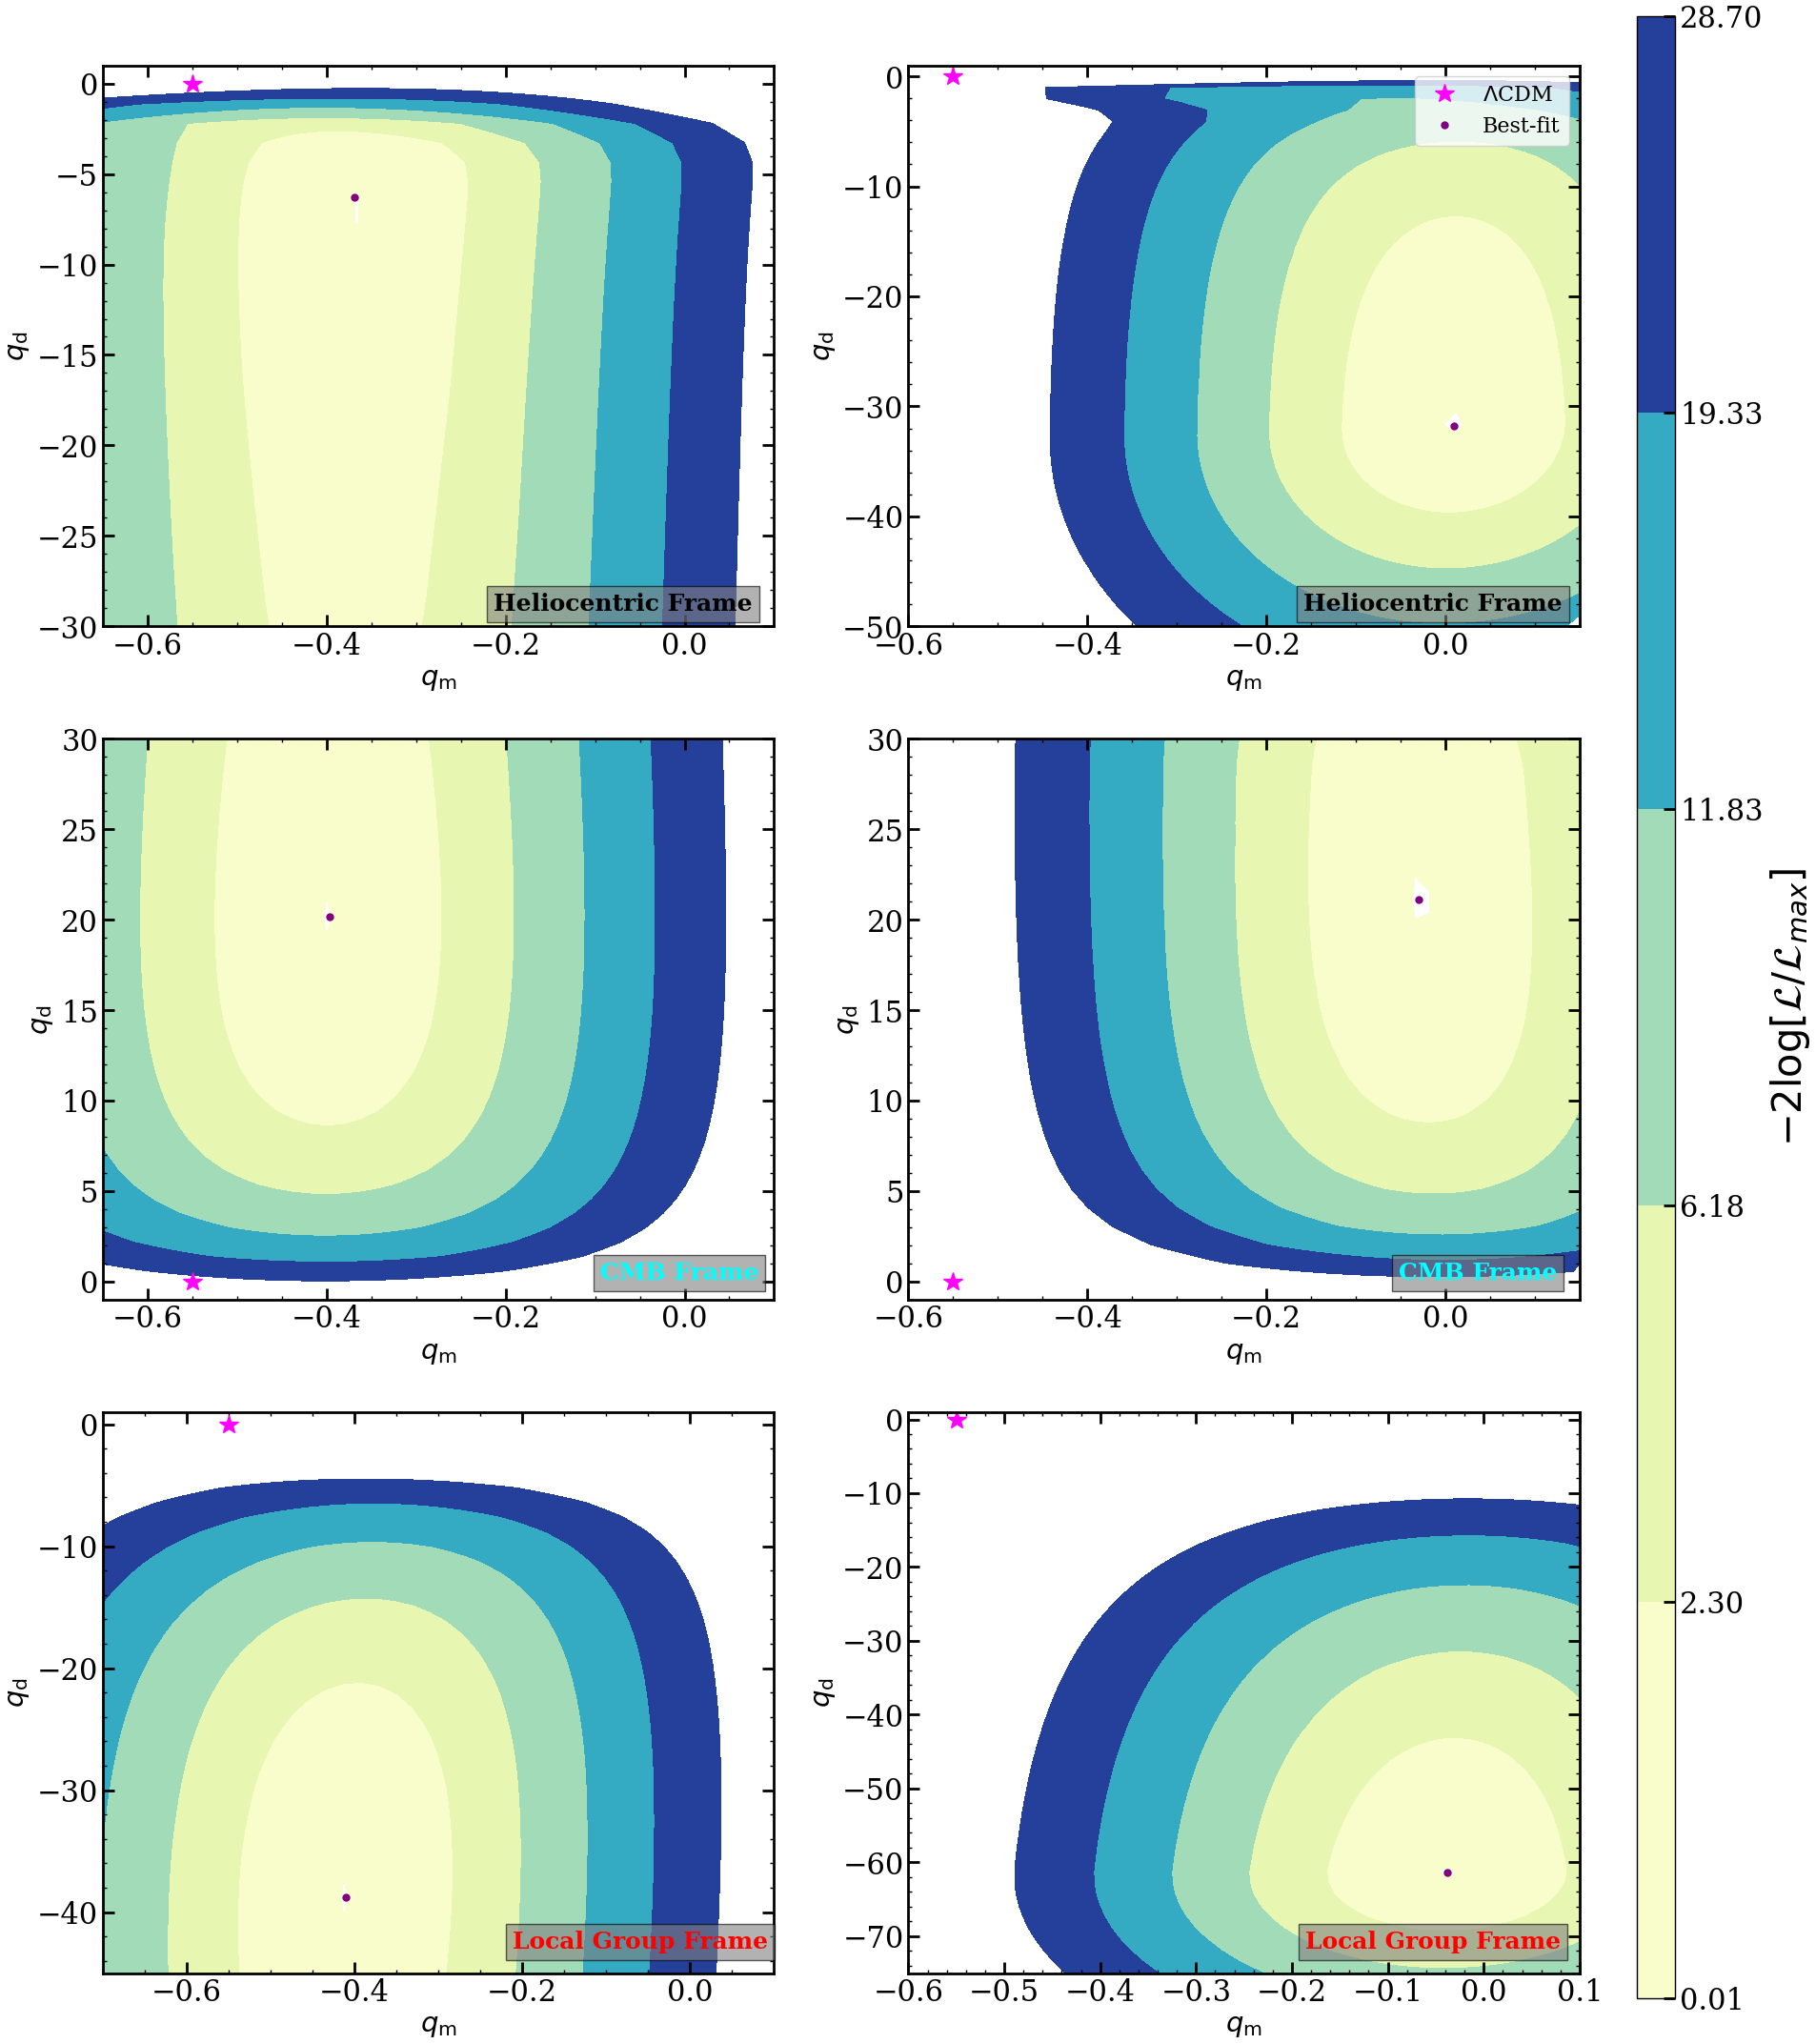

In [ ]:
# fig, ax = plt.subplots(3, 2, figsize=(20,26))
# #fig.tight_layout()

# ax[1,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
# contour_plot= ax[1,0].contourf(x_C1_CMB, y_C1_CMB, np.array(MLE_C1_CMB)+1519.33, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
# #plt.contourf(x, y, np.array(MLE_CMB)+1519.33, cmap='YlGnBu',levels=5)
# ax[1,0].plot(-0.397, 20.14,'.',ms='10',label='Best-fit',color='purple')

# #leg=plt.legend(frameon=True,fontsize=20)
# #cbar =plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
# #cbar.ax.yaxis.label.set_fontsize(18)
# ax[1,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[1,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# ax[0,0].contourf(x_C1_HEL, y_C1_HEL, np.array(MLE_C1_HEL)+1507.37, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
# #plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')
# ax[0,1].set_ylim(-50,1)

# ax[0,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
# ax[0,0].plot(-0.369, -6.27 ,'.',ms='10',label='Best-fit',color='purple')
# ax[0,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[0,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)


# ax[2,0].contourf(x_C1_LG, y_C1_LG, np.array(MLE_C1_LG)+1500.142617858973, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
# ax[2,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
# ax[2,0].plot(-4.10268430e-01, -3.88007944e+01,'.',ms='10',label='Best-fit',color='purple')
# ax[2,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[2,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# #ax[0,0].tricontourf(qm_hel, qd_hel, np.array(MLE_hel), cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
# #plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')

# ax[0,1].tricontourf(qm_hel_C2 , qd_hel_C2, MLE_hel_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,], cmap="YlGnBu")
# ax[0,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
# #ax[0,1].plot(-0.198, -14.717, '.', ms='10', label='Best-fit',color='purple')
# ax[0,1].plot(0.01,-31.76, '.', ms='10', label='Best-fit',color='purple')

# ax[0,1].legend(frameon=True)

# ax[0,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[0,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# ax[1,0].set_ylim(-1,30)

# ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')
# #ax[1,1].legend(frameon=True)

# ax[1,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
# ax[1,1].tricontourf(qm_CMB_C2, qd_CMB_C2, MLE_CMB_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,], cmap="YlGnBu")

# ax[1,1].set_ylim(-1,30)

# ax[1,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[1,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# ax[1,1].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')

# ax[2,0].set_ylim(-45,1)

# ax[2,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')


# #ax[2,1].contourf(x_C2_LG, y_C2_LG, MLE_LG_C2_corrdl+151.69358142520105,cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
# ax[2,1].plot(-3.78313270e-02,-6.14145470e+01, '.', ms='10', label='Best-fit',color='purple')

# #ax[2,1].contourf(X_C2_LG, Y_C2_LG, MLE_C2_LG+151.02687934015466, cmap='YlGnBu',levels=levels)
# ax[2,1].tricontourf(qm_LG_C2, qd_LG_C2, MLE_LG_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,], cmap="YlGnBu")

# ax[2,1].set_ylim(-75,1)
# ax[2,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
# ax[2,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# # for i in range(0,3):
# #     for j in range (0,2):
# #         ax[i,j].tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
# #         for axis in 'left', 'bottom','top','right':
# #            ax[i,j].spines[axis].set_linewidth(2)
# for i in range(0, 3):
#     for j in range(0, 2):
        
#             ax[i, j].set_ylim(ax[i, j].get_ylim())  # To ensure consistent axis limits
#             ax[i, j].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')
#             for axis in ['left', 'bottom', 'top', 'right']:
#                 ax[i, j].spines[axis].set_linewidth(2)

# fig.text(0.386,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')
# fig.text(0.805,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')

# fig.text(0.33,0.66,'Heliocentric Frame',size=18 ,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')
# fig.text(0.755,0.66,'Heliocentric Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')

# fig.text(0.34,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
# fig.text(0.756,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
# #fig.tight_layout(pad=1.0)
# #fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Increase horizontal and vertical space between subplots

# cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
# cbar = fig.colorbar(contour_plot, cax=cax)
# cbar.set_label('$-2 \log [\mathcal{L}/\mathcal{L}_{max}]$', fontsize=30)
# for axis in 'left', 'bottom','top','right':
#            cbar.ax.spines[axis].set_linewidth(2)
# cbar.ax.tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
# # Set y-ticks at 0, 5, 10, 15, 20
# ax[1,1].set_yticks([0, 5, 10, 15, 20,25,30])

# # Set corresponding labels
# ax[1,1].set_yticklabels(['0', '5', '10', '15', '20','25','30'], fontsize=22)

# #plt.show()
# plt.savefig('qd_qm_lane_v2.pdf')


/tmp/ipykernel_3887100/4100881329.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')


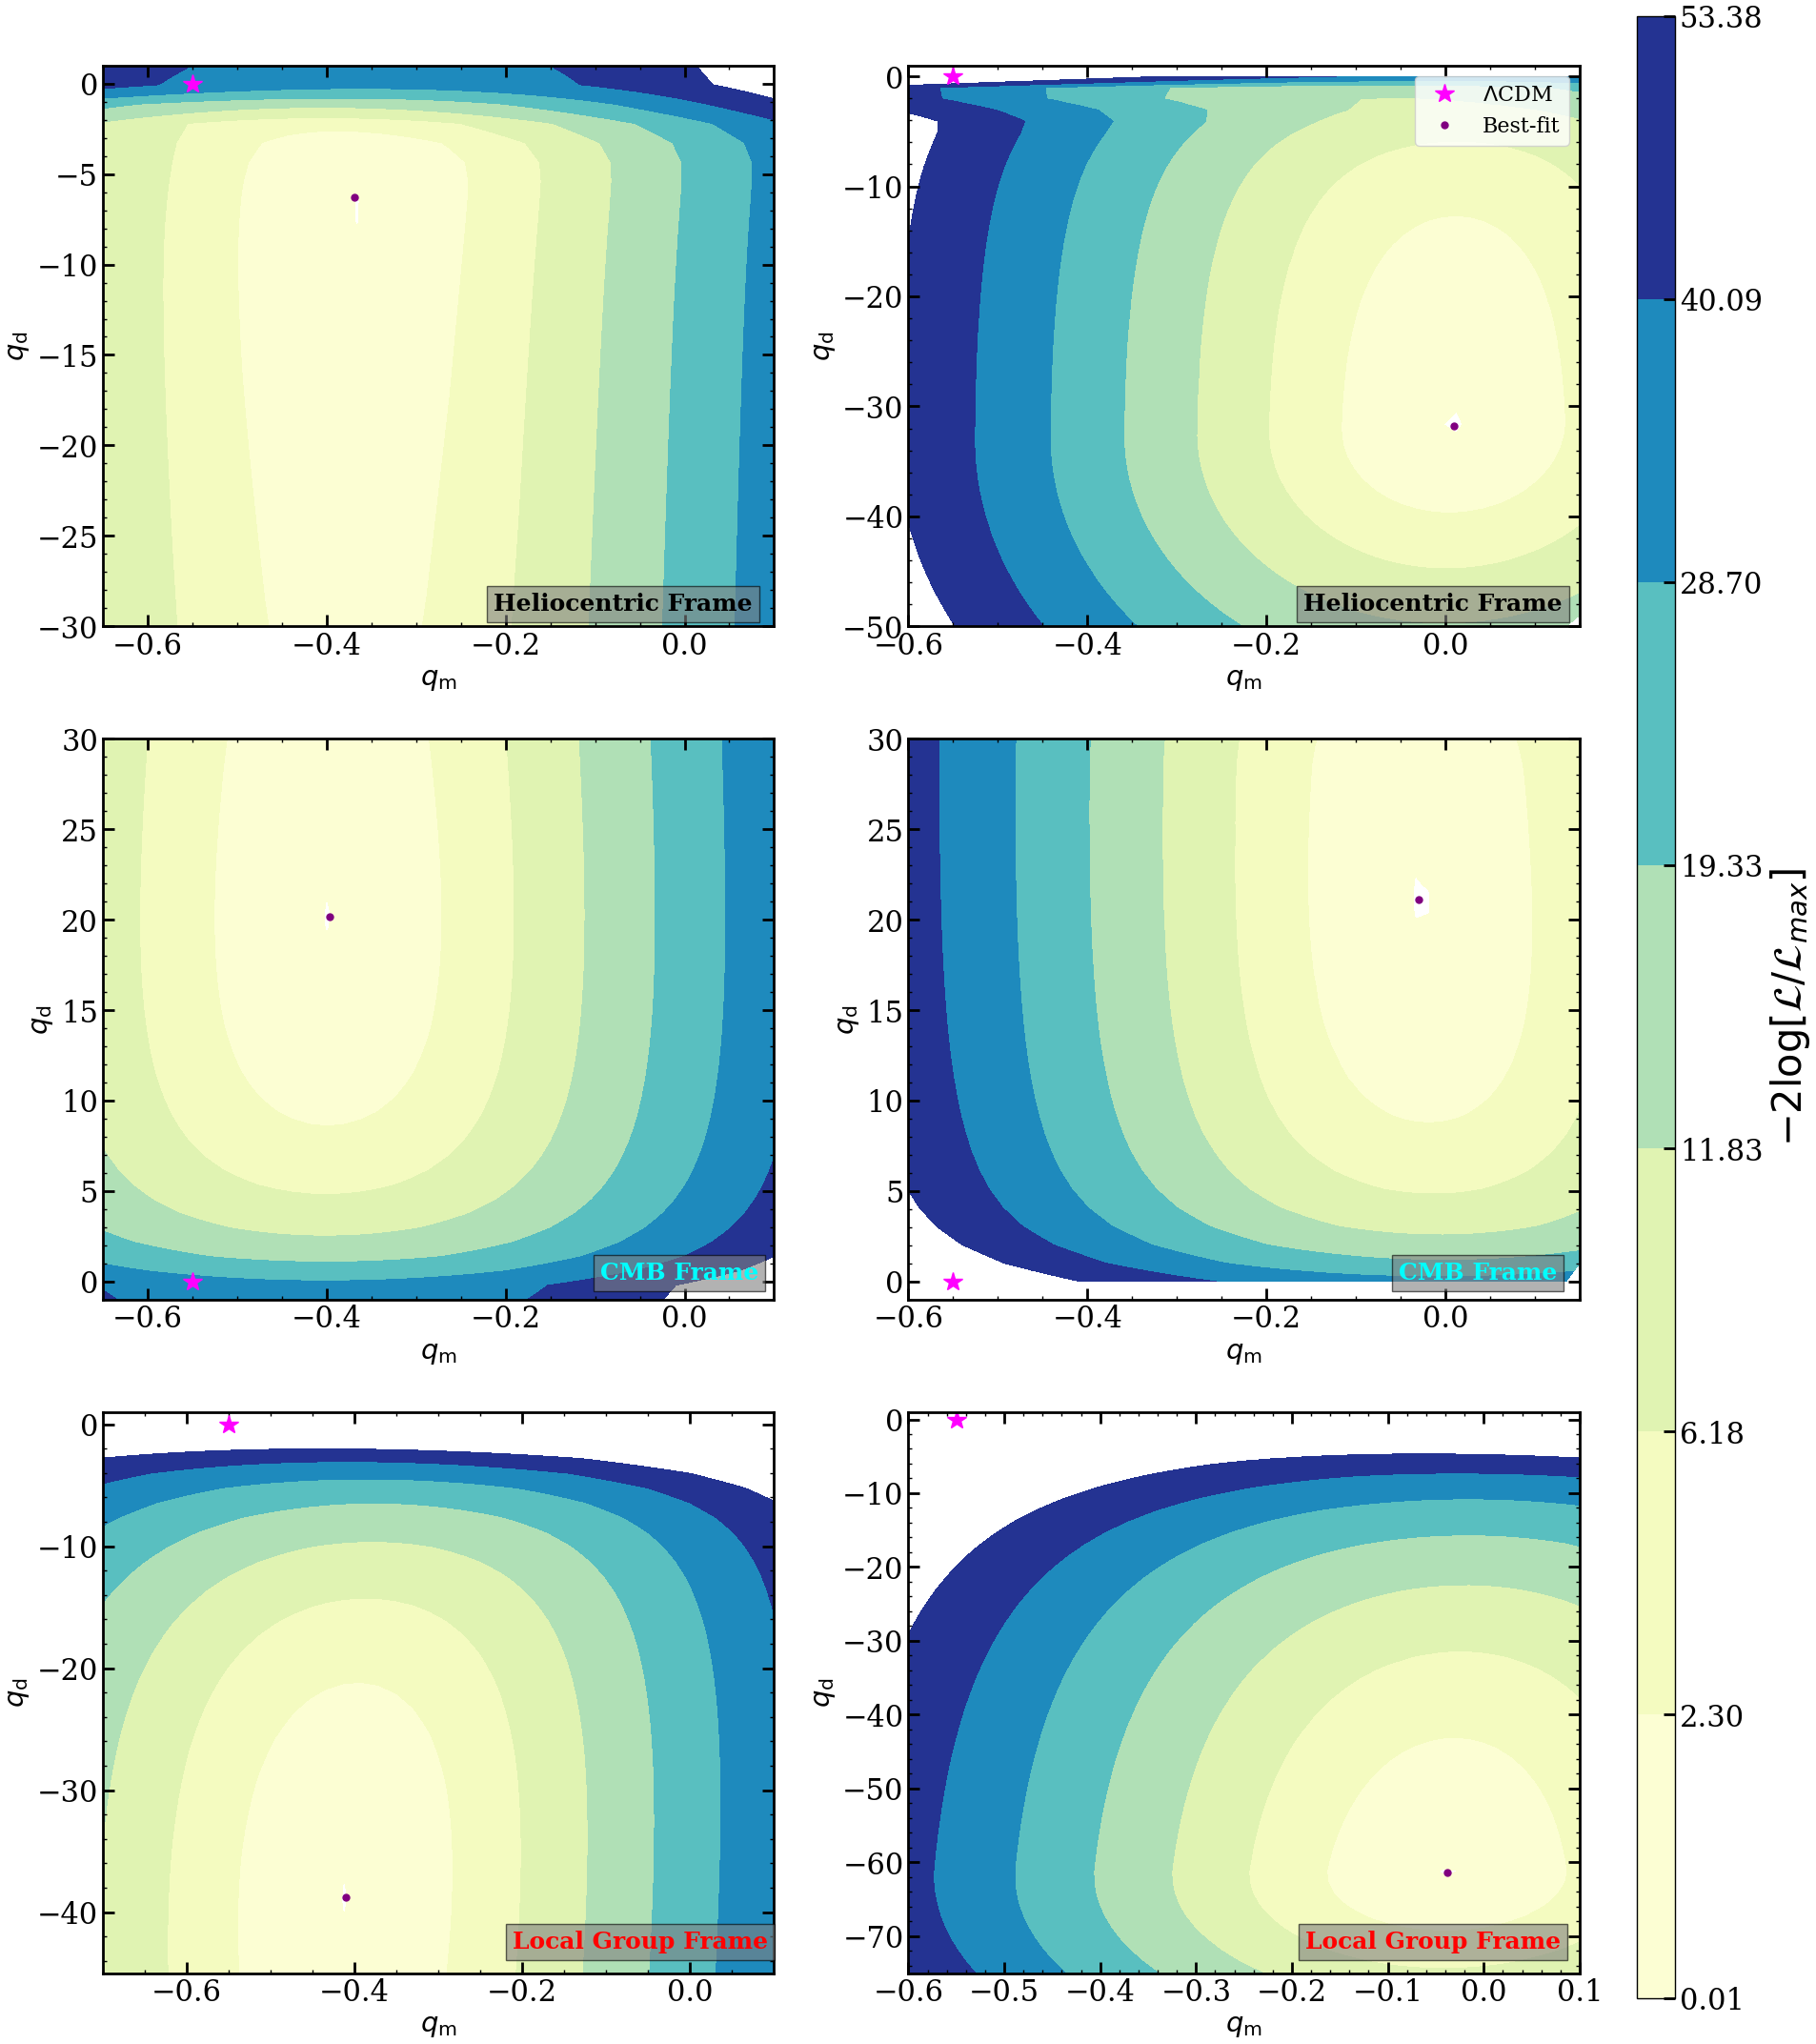

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,26))
#fig.tight_layout()

ax[1,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
contour_plot= ax[1,0].contourf(x_C1_CMB, y_C1_CMB, np.array(MLE_C1_CMB)+1519.33, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
#plt.contourf(x, y, np.array(MLE_CMB)+1519.33, cmap='YlGnBu',levels=5)
ax[1,0].plot(-0.397, 20.14,'.',ms='10',label='Best-fit',color='purple')

#leg=plt.legend(frameon=True,fontsize=20)
#cbar =plt.colorbar(label='$-2 log [\mathcal{L}/\mathcal{L}_{max}]$')
#cbar.ax.yaxis.label.set_fontsize(18)
ax[1,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[1,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[0,0].contourf(x_C1_HEL, y_C1_HEL, np.array(MLE_C1_HEL)+1507.37, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
#plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')
ax[0,1].set_ylim(-50,1)

ax[0,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[0,0].plot(-0.369, -6.27 ,'.',ms='10',label='Best-fit',color='purple')
ax[0,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[0,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)


ax[2,0].contourf(x_C1_LG, y_C1_LG, np.array(MLE_C1_LG)+1500.142617858973, cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38])
ax[2,0].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[2,0].plot(-4.10268430e-01, -3.88007944e+01,'.',ms='10',label='Best-fit',color='purple')
ax[2,0].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[2,0].set_ylabel('$q_\mathrm{d}$',fontsize=21)

#ax[0,0].tricontourf(qm_hel, qd_hel, np.array(MLE_hel), cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
#plt.contourf(x, y, np.array(MLE_HEL)+1507.37, cmap='YlGnBu')

ax[0,1].tricontourf(qm_hel_C2 , qd_hel_C2, MLE_hel_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")
ax[0,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
#ax[0,1].plot(-0.198, -14.717, '.', ms='10', label='Best-fit',color='purple')
ax[0,1].plot(0.01,-31.76, '.', ms='10', label='Best-fit',color='purple')

ax[0,1].legend(frameon=True)

ax[0,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[0,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[1,0].set_ylim(-1,30)

ax[1,1].plot(-0.03,21.1,'r.','.',label='Best-fit',ms=10,color='purple')
#ax[1,1].legend(frameon=True)

ax[1,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')
ax[1,1].tricontourf(qm_CMB_C2, qd_CMB_C2, MLE_CMB_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")

ax[1,1].set_ylim(-1,30)

ax[1,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[1,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

ax[1,1].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')

ax[2,0].set_ylim(-45,1)

ax[2,1].plot(-0.55, 0, '*',color='magenta', ms='15', label='$\Lambda$CDM')


#ax[2,1].contourf(x_C2_LG, y_C2_LG, MLE_LG_C2_corrdl+151.69358142520105,cmap='YlGnBu',levels=[0.01,2.295749,6.18,11.829,19.33,28.7])
ax[2,1].plot(-3.78313270e-02,-6.14145470e+01, '.', ms='10', label='Best-fit',color='purple')

#ax[2,1].contourf(X_C2_LG, Y_C2_LG, MLE_C2_LG+151.02687934015466, cmap='YlGnBu',levels=levels)
ax[2,1].tricontourf(qm_LG_C2, qd_LG_C2, MLE_LG_C2, levels=[0.01,2.295749,6.18,11.829,19.33,28.7,40.09,53.38], cmap="YlGnBu")

ax[2,1].set_ylim(-75,1)
ax[2,1].set_xlabel('$q_\mathrm{m}$',fontsize=21)
ax[2,1].set_ylabel('$q_\mathrm{d}$',fontsize=21)

# for i in range(0,3):
#     for j in range (0,2):
#         ax[i,j].tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
#         for axis in 'left', 'bottom','top','right':
#            ax[i,j].spines[axis].set_linewidth(2)
for i in range(0, 3):
    for j in range(0, 2):
        
            ax[i, j].set_ylim(ax[i, j].get_ylim())  # To ensure consistent axis limits
            ax[i, j].tick_params(labelsize=22, width=2, length=8.5, axis='both', which='major')
            for axis in ['left', 'bottom', 'top', 'right']:
                ax[i, j].spines[axis].set_linewidth(2)

fig.text(0.386,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')
fig.text(0.805,0.39,'CMB Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='cyan',weight='bold')

fig.text(0.33,0.66,'Heliocentric Frame',size=18 ,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')
fig.text(0.755,0.66,'Heliocentric Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5,},weight='bold')

fig.text(0.34,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
fig.text(0.756,0.12,'Local Group Frame',size=18,bbox={'facecolor': 'gray','alpha': 0.6, 'pad': 5},color='red',weight='bold')
#fig.tight_layout(pad=1.0)
#fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Increase horizontal and vertical space between subplots

cax = fig.add_axes([0.93, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
cbar = fig.colorbar(contour_plot, cax=cax)
cbar.set_label('$-2 \log [\mathcal{L}/\mathcal{L}_{max}]$', fontsize=30)
for axis in 'left', 'bottom','top','right':
           cbar.ax.spines[axis].set_linewidth(2)
cbar.ax.tick_params(labelsize=22,width=2,length=8.5,axis='both',which='major')
# Set y-ticks at 0, 5, 10, 15, 20
ax[1,1].set_yticks([0, 5, 10, 15, 20,25,30])

# Set corresponding labels
ax[1,1].set_yticklabels(['0', '5', '10', '15', '20','25','30'], fontsize=22)

plt.show()

